## Import packages

In [1]:
import numpy as np
import simulators.jla_supernovae.jla_simulator as jla
import pydelfi.ndes as ndes
import pydelfi.delfi_edit as delfi
import pydelfi.score as score
import pydelfi.priors as priors
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
%matplotlib inline

In [2]:
import pylab as plt
import pyccl as ccl
import scipy
from scipy.interpolate import interp1d

import matplotlib
%matplotlib inline

import time
import importlib

print("CCL version you are using:",ccl.__version__)

CCL version you are using: 2.1.0


In [3]:
font_config = {"size" : 10,
               "family" : "serif"}

matplotlib.rc("font", **font_config)
matplotlib.rc("text", usetex=True)
# Move title to make space for exponents of y axis
matplotlib.rc("axes", titlepad=5) 
matplotlib.rc("axes", titlesize="medium") 

# Make the figures bigger in the notebook
matplotlib.rc("figure", dpi=150)

color_map = plt.get_cmap("tab10")

paper_textwidth = 7.125
fig_size = (paper_textwidth/2, 2.6)

plot_adjust = dict(left=0.2, top=0.9, bottom=0.2)

In [4]:
import simulators.mass_function_n_counts.simulator_trapz_tinker_2params as n_counts_simulator
importlib.reload(n_counts_simulator)

<module 'simulators.mass_function_n_counts.simulator_trapz_tinker_2params' from '/home/aizhana/pydelfi_cluster_counts/examples/simulators/mass_function_n_counts/simulator_trapz_tinker_2params.py'>

In [5]:
log10masses = np.linspace(14, 15.5, num = 4)
z_min = np.linspace(0.1, 0.9, num = 5)
z_max = np.linspace(0.2, 1.0, num = 5)
log10masses_2d = np.stack((log10masses[:-1], log10masses[1:]))

In [6]:
N_countsSimulator = n_counts_simulator.Model(log10masses, z_min, z_max)
N_counts = N_countsSimulator.N_counts.reshape(len(log10masses) - 1, len(z_min))

## Plot the learned posterior
Feed it a list of `(n_samples, n_parameters)` arrays for making a triangle plot; in this case let's just plot the posterior samples.

(Here I am just uploading posteriors from previous pydelfi runs)

In [7]:
import getdist
from getdist import plots, MCSamples
import matplotlib as mpl
from matplotlib.patches import Ellipse
from scipy.stats import norm

### Load MCMC chains for two different data vectors

In [8]:
flat_samples = np.load('flat_samples_1000.npy')
flat_samples = [flat_samples]

In [9]:
mcmc_samples = [MCSamples(samples=s, 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(flat_samples)]

Removed no burn in


In [10]:
flat_samples_s = np.load('flat_samples_1000_seed1.npy')
flat_samples_s = [flat_samples_s]

In [11]:
mcmc_samples_s = [MCSamples(samples=s, 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(flat_samples_s)]

Removed no burn in


### Load the learned posterior from simulations with fine grid and compare it to MCMC results

### (1) data vector 1

#### 1k by 1k grid is too coarse - doesn't produce accurate results

In [70]:
posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_NsimsData_Poisson_fiducial_1kby1k/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_NsimsData_Poisson_fiducial_1kby1k/posterior_weights.npy')
# from simulators.mass_function_n_counts.simulator_trapz_tinker_2params_mock_catalogue_v2_og_bins_3

samples = [posterior_samples]
weights = [posterior_weights]
delfi_samples = [MCSamples(samples=s, weights=weights[i], 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        #ranges={'\\Omega_{cdm}h^{2}': [0.1118, 0.1222], '\\sigma_{8}': [0.755, 0.765]}) 
                        ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(samples)]

Removed no burn in


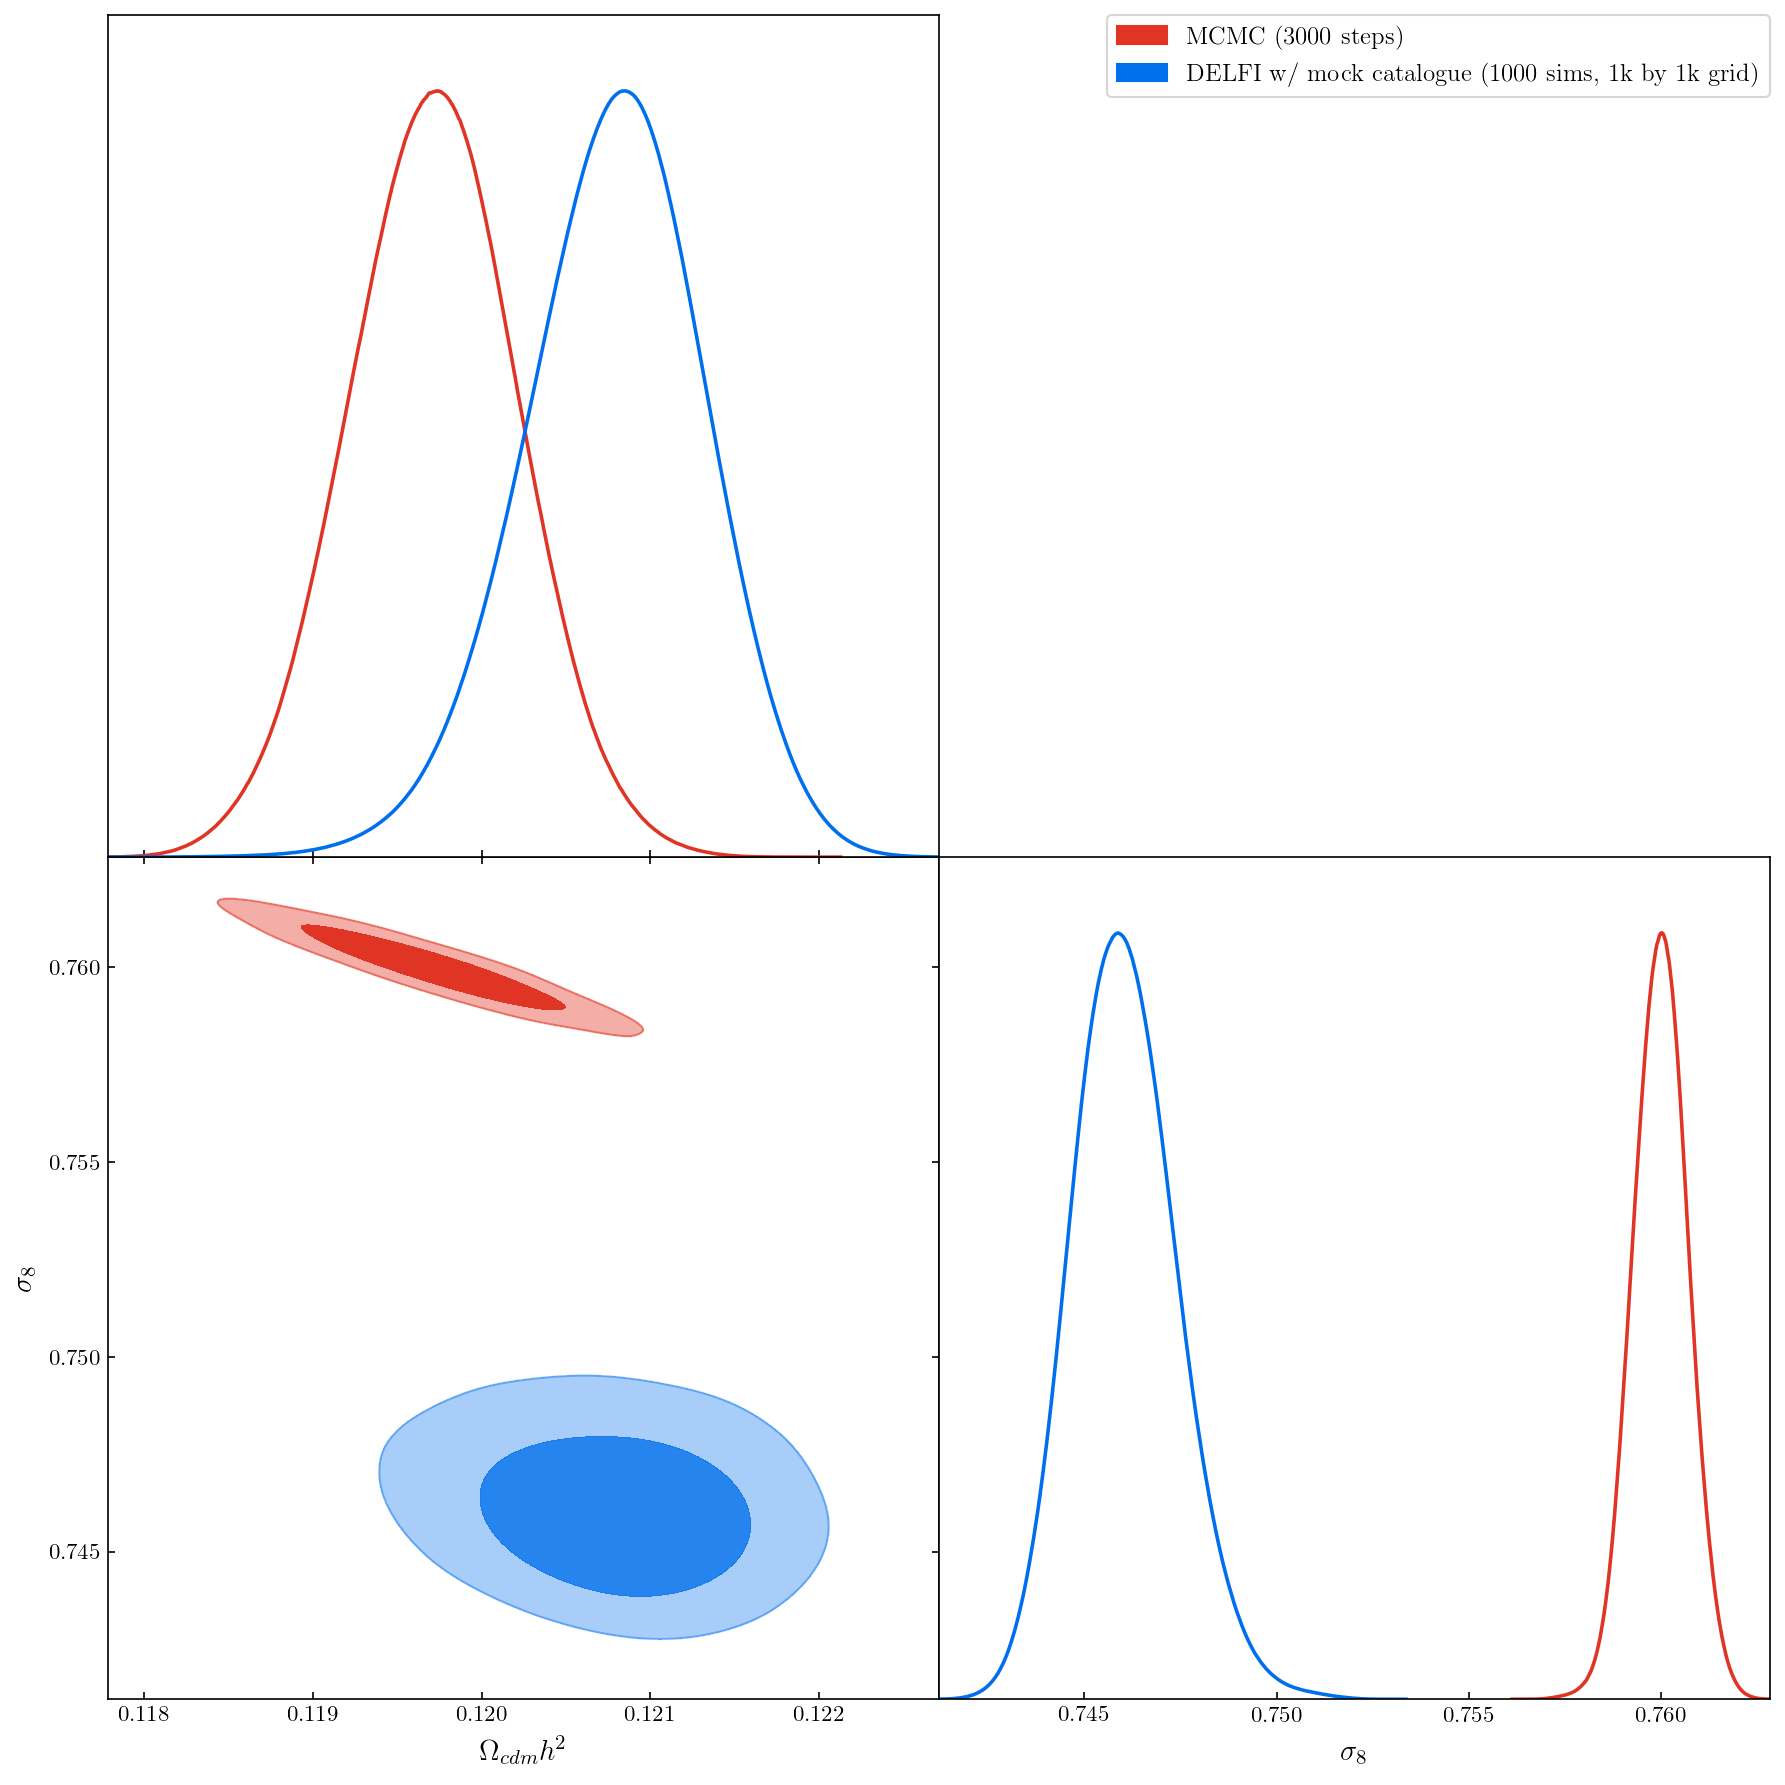

In [71]:
g = plots.getSubplotPlotter(width_inch = 12)
g.triangle_plot([mcmc_samples[0], delfi_samples[0]], 
                legend_labels = ['MCMC (3000 steps)', 'DELFI w/ mock catalogue (1000 sims, 1k by 1k grid)'],
                legend_loc = 'upper right',
                filled_compare=True, normalized=True)

#### 1k by 10k grid seems to produce accurate results for this  data vector

In [72]:
posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_fiducial/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_fiducial/posterior_weights.npy')


samples = [posterior_samples]
weights = [posterior_weights]
delfi_samples = [MCSamples(samples=s, weights=weights[i], 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        #ranges={'\\Omega_{cdm}h^{2}': [0.1118, 0.1222], '\\sigma_{8}': [0.755, 0.765]}) 
                        ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(samples)]

Removed no burn in


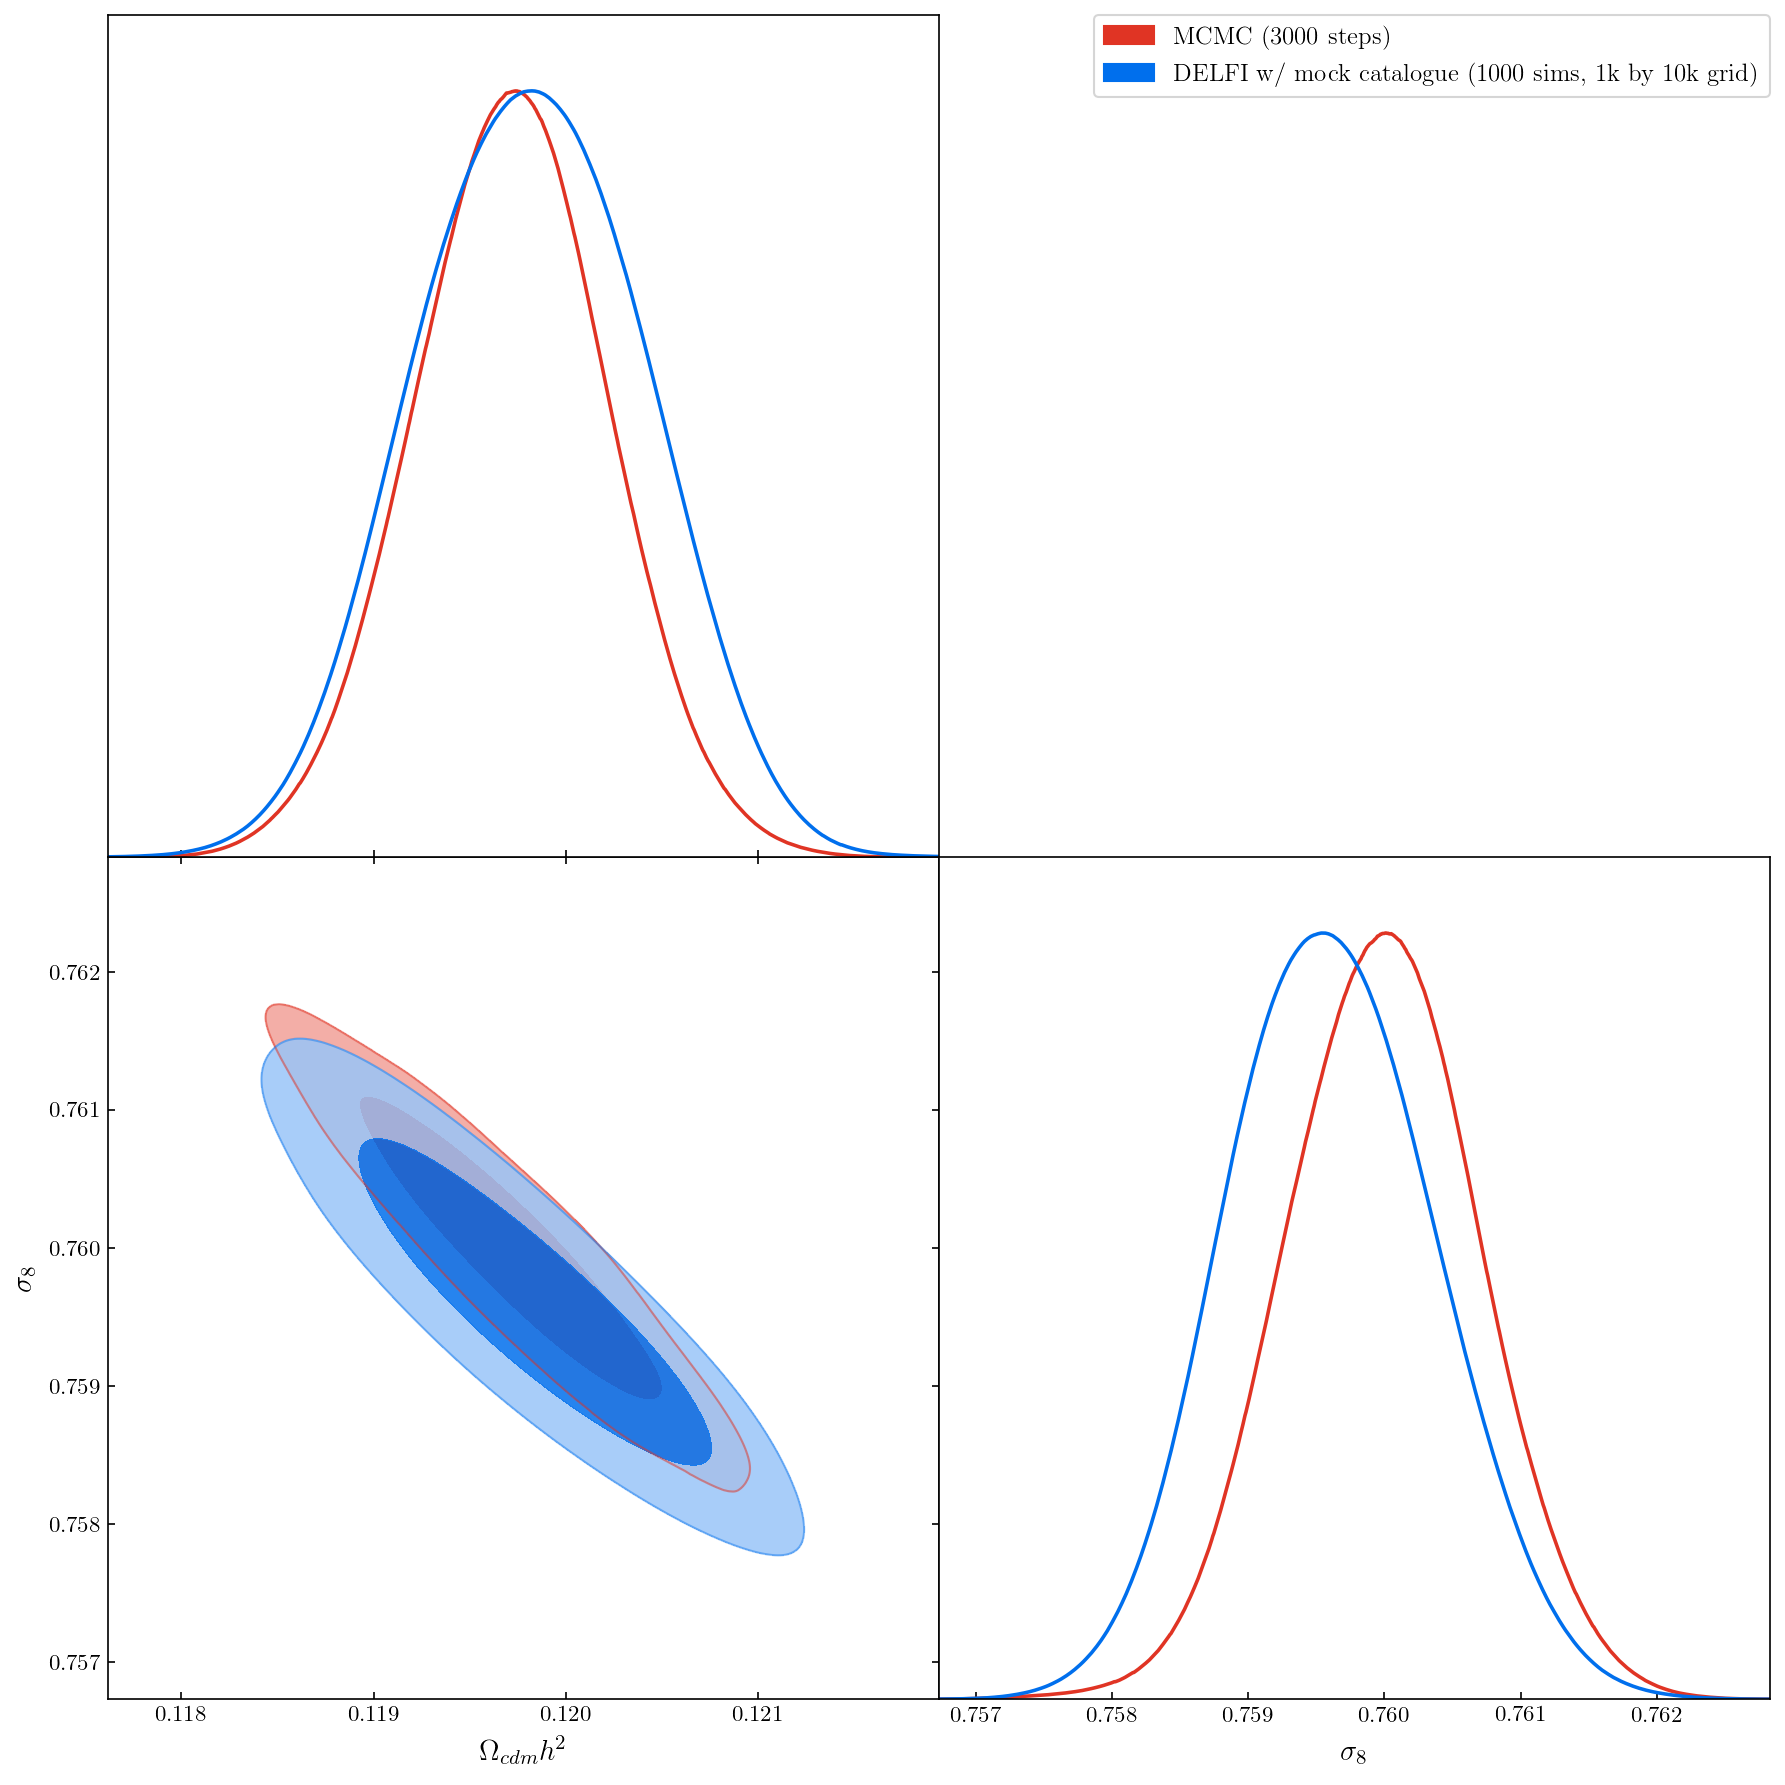

In [73]:
g = plots.getSubplotPlotter(width_inch = 12)
g.triangle_plot([mcmc_samples[0], delfi_samples[0]], 
                legend_labels = ['MCMC (3000 steps)', 'DELFI w/ mock catalogue (1000 sims, 1k by 10k grid)'],
                legend_loc = 'upper right',
                filled_compare=True, normalized=True)

### (2) data vector 2, 2k by 10k grid

In [15]:
# 1000 simulations - doesn't look bad, but still needs more simulations to converge
posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_2kby10k/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_2kby10k/posterior_weights.npy')

# 2000 simulations
posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_2kby10k_2k/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_2kby10k_2k/posterior_weights.npy')

samples = [posterior_samples]
weights = [posterior_weights]
delfi_samples_s = [MCSamples(samples=s, weights=weights[i], 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        #ranges={'\\Omega_{cdm}h^{2}': [0.1118, 0.1222], '\\sigma_{8}': [0.755, 0.765]}) 
                        ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(samples)]


Removed no burn in


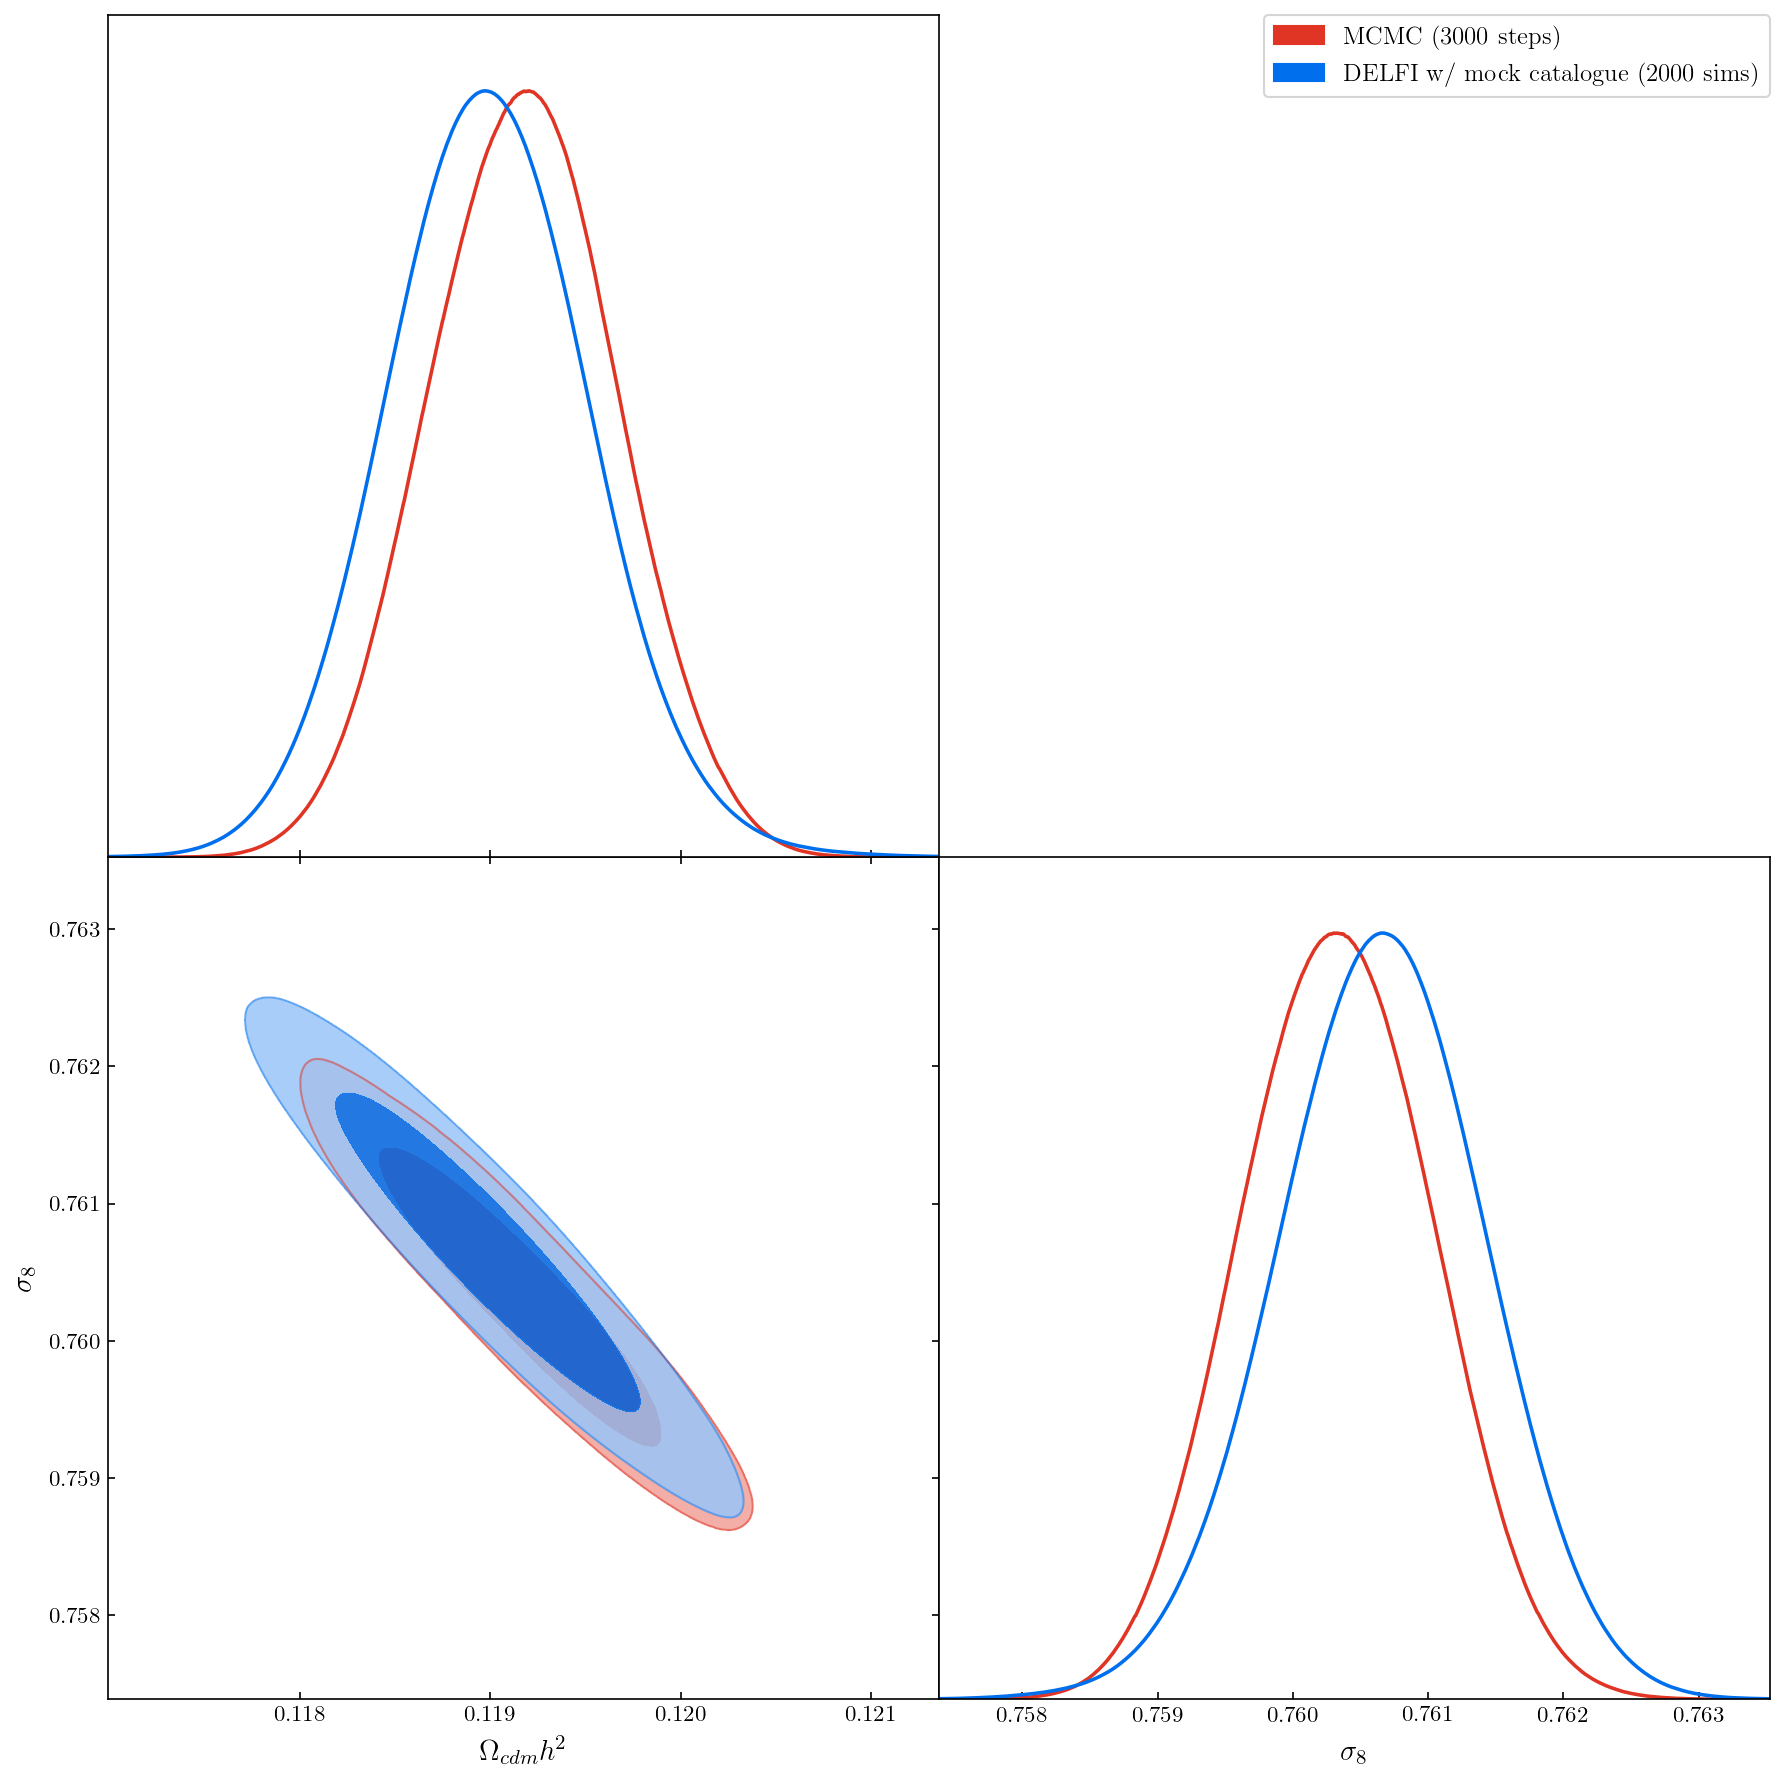

In [17]:
g = plots.getSubplotPlotter(width_inch = 12)
g.triangle_plot([mcmc_samples_s[0], delfi_samples_s[0]], 
                legend_labels = ['MCMC (3000 steps)', 'DELFI w/ mock catalogue (2000 sims)'],
                legend_loc = 'upper right',
                filled_compare=True, normalized=True)

#### 1k by 10k grid looks like it could converge, but the results are not very accurate even after 2000 simulations

In [68]:

posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_2k/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_2k/posterior_weights.npy')


samples = [posterior_samples]
weights = [posterior_weights]
delfi_samples_s = [MCSamples(samples=s, weights=weights[i], 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        #ranges={'\\Omega_{cdm}h^{2}': [0.1118, 0.1222], '\\sigma_{8}': [0.755, 0.765]}) 
                        ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(samples)]


Removed no burn in


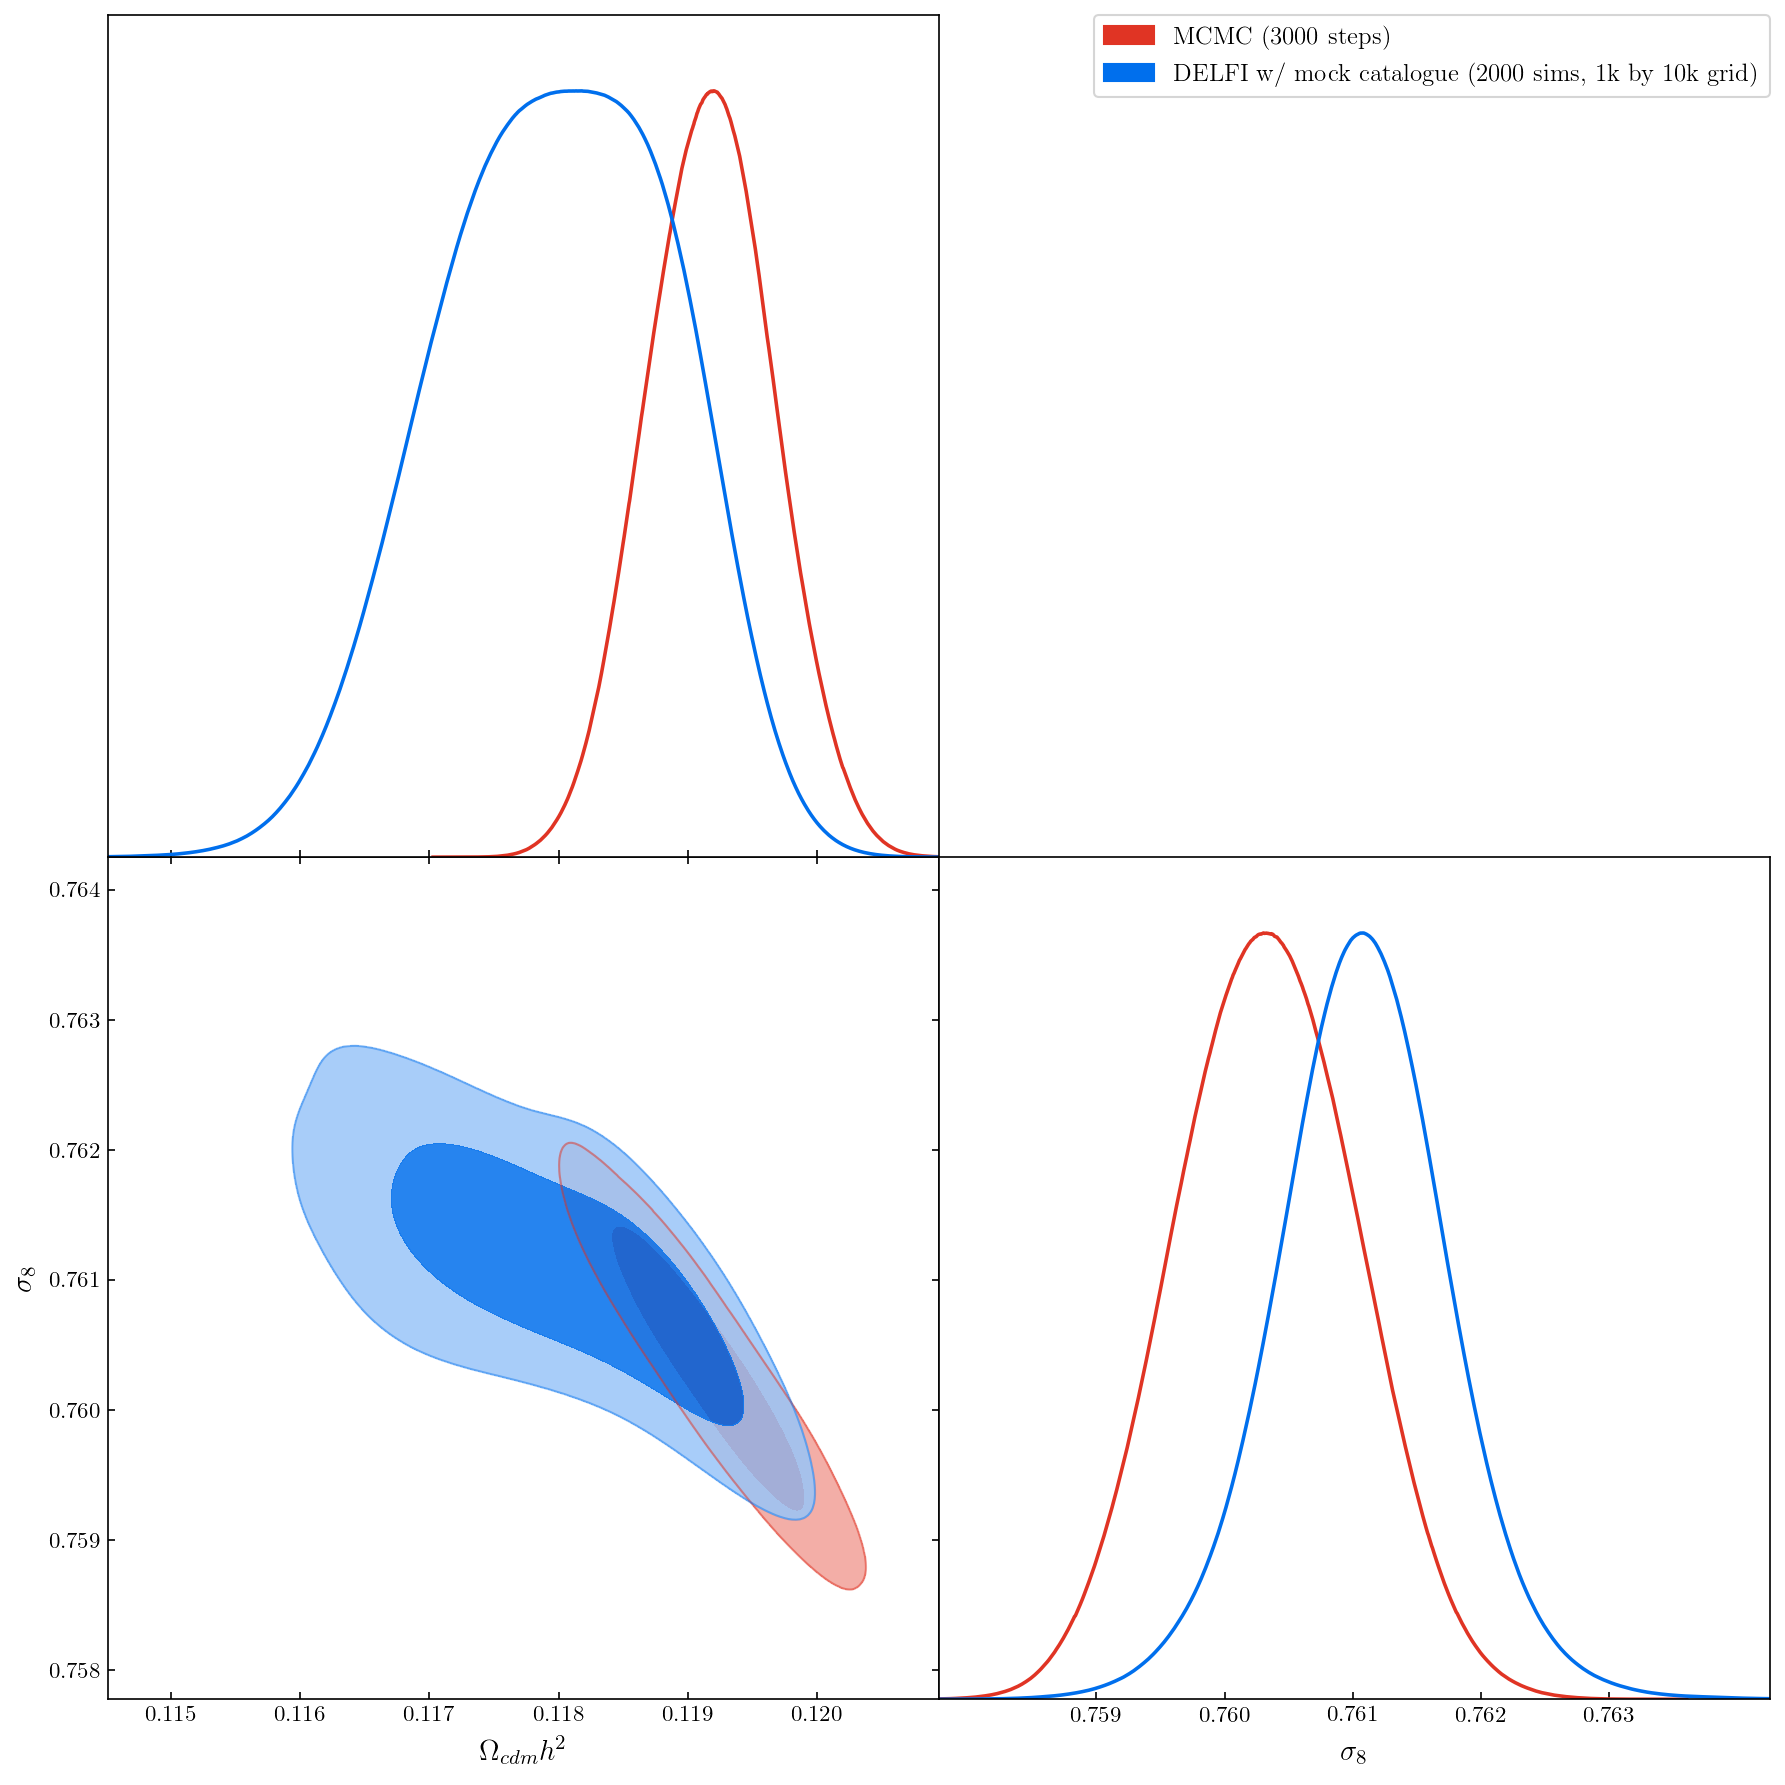

In [69]:
g = plots.getSubplotPlotter(width_inch = 12)
g.triangle_plot([mcmc_samples_s[0], delfi_samples_s[0]], 
                legend_labels = ['MCMC (3000 steps)', 'DELFI w/ mock catalogue (2000 sims, 1k by 10k grid)'],
                legend_loc = 'upper right',
                filled_compare=True, normalized=True)

#### 1k by 1k grid is too coarse - not accurate results

In [66]:
posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_NsimsData_Poisson_seed1_1kby1k/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_NsimsData_Poisson_seed1_1kby1k/posterior_weights.npy')

samples = [posterior_samples]
weights = [posterior_weights]
delfi_samples = [MCSamples(samples=s, weights=weights[i], 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(samples)]

Removed no burn in


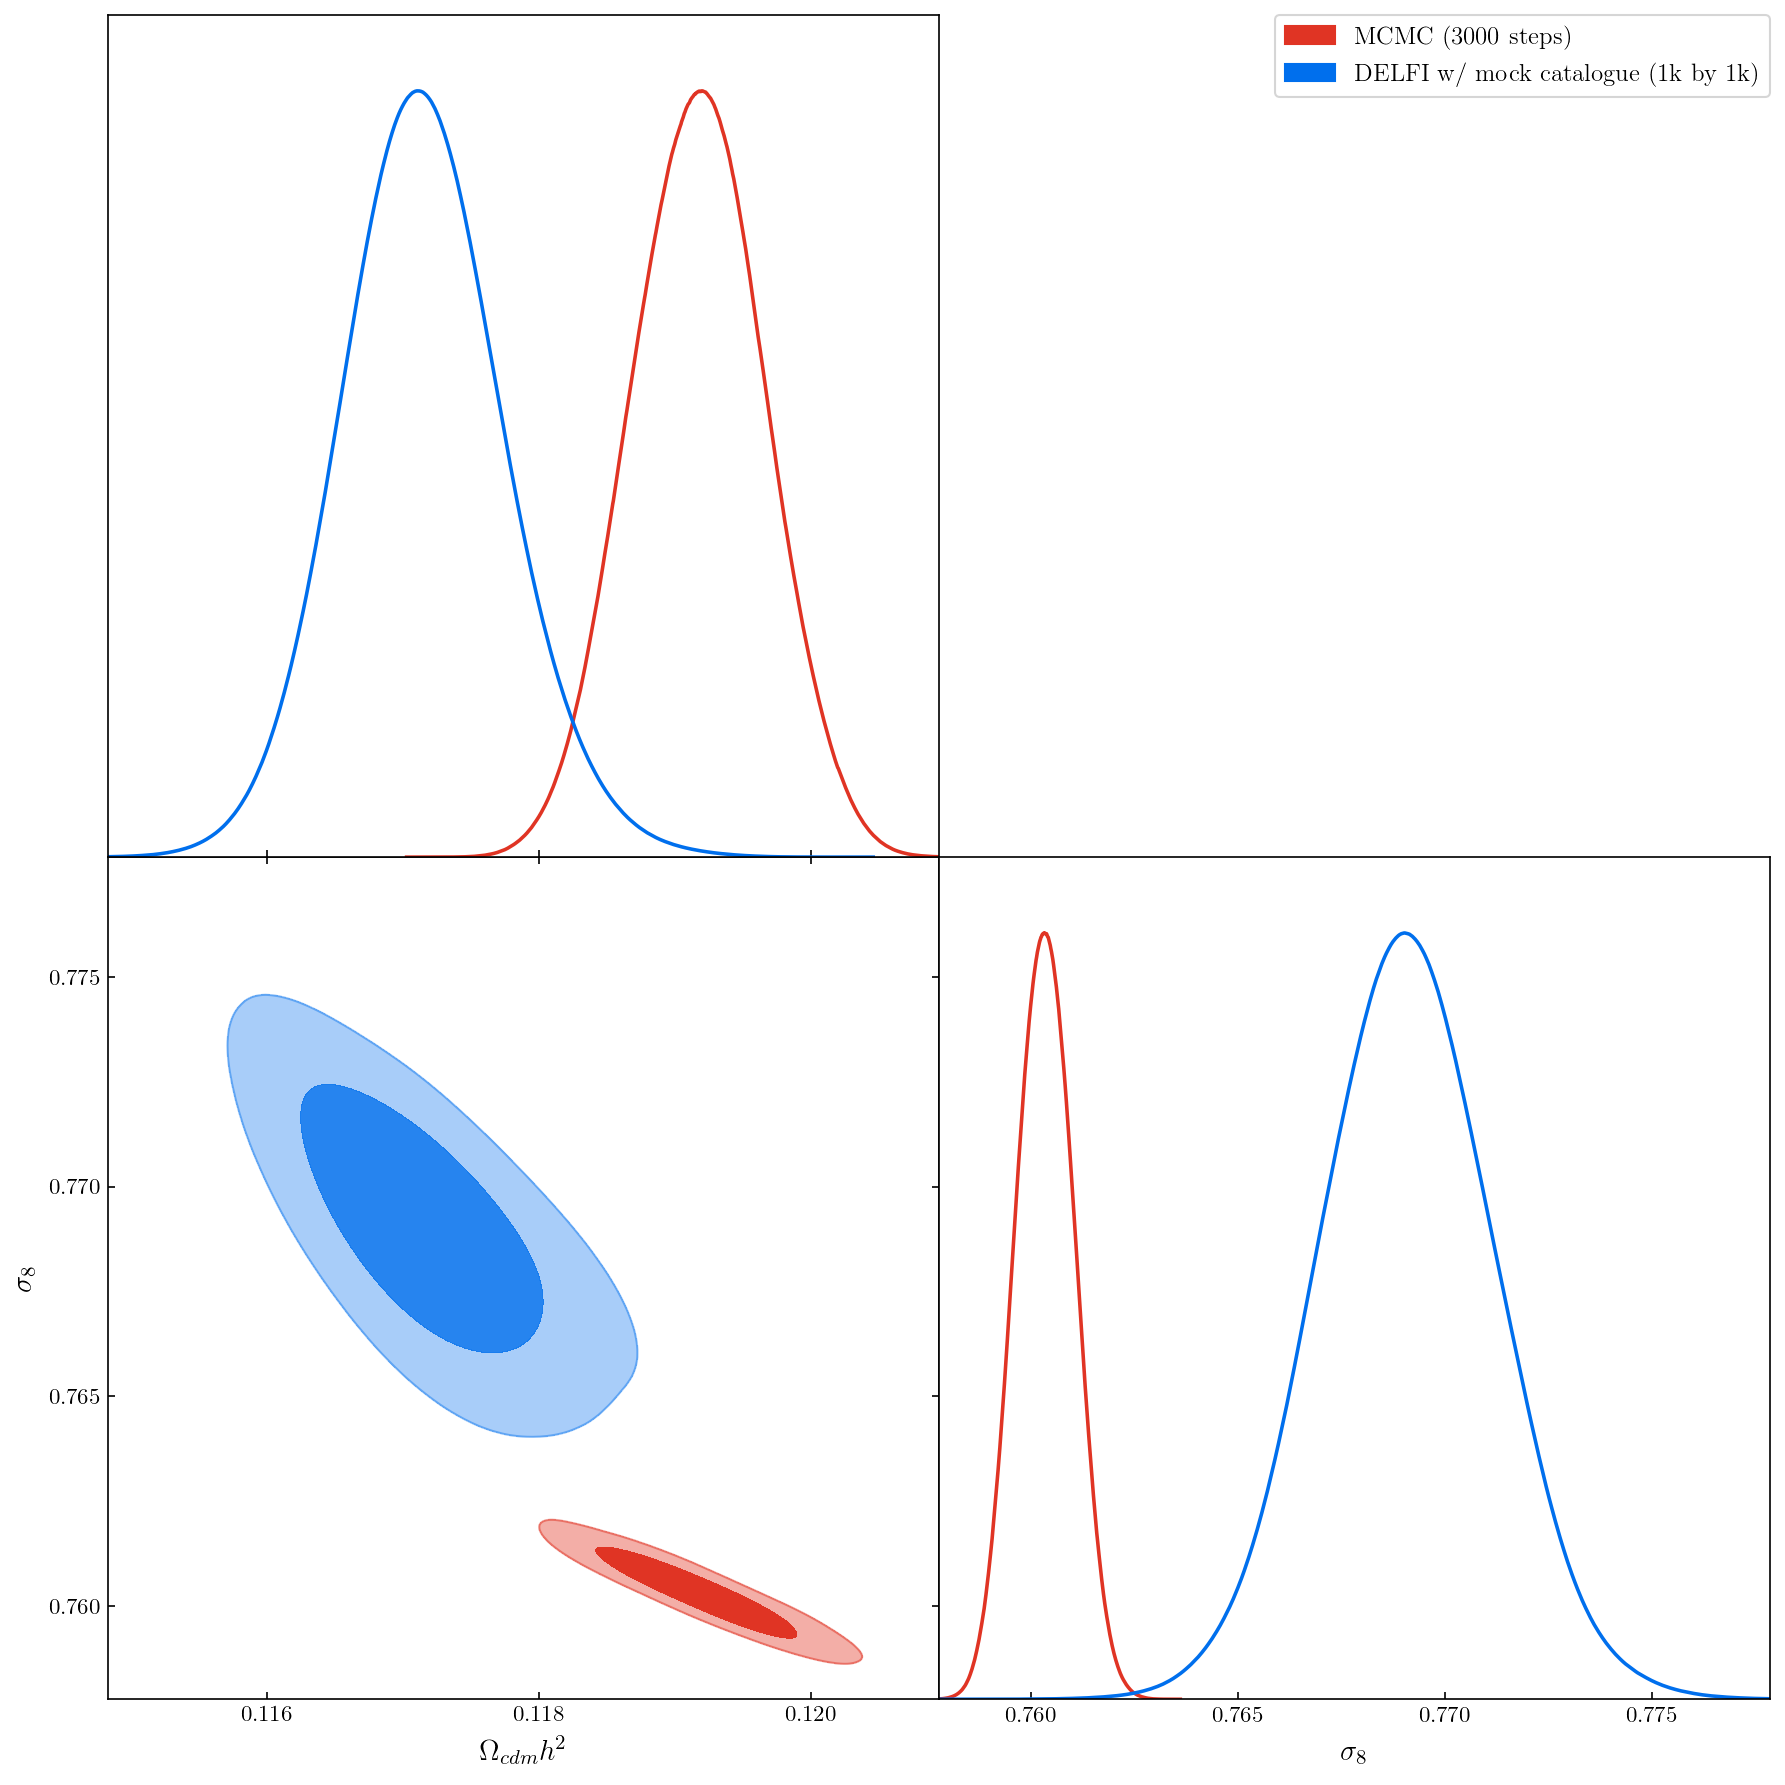

In [67]:
g = plots.getSubplotPlotter(width_inch = 12)
g.triangle_plot([mcmc_samples_s[0], delfi_samples[0]], 
                legend_labels = ['MCMC (3000 steps)', 'DELFI w/ mock catalogue (1k by 1k)'],
                legend_loc = 'upper right',
                filled_compare=True, normalized=True)

### (3) Using interpolation

In [35]:



posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_2/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_2/posterior_weights.npy')

posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp/posterior_weights.npy')


posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_3/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_3/posterior_weights.npy')

posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_4NDEs_2k/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_4NDEs_2k/posterior_weights.npy')

posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_4NDEs/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_4NDEs/posterior_weights.npy')

samples = [posterior_samples]
weights = [posterior_weights]
delfi_samples = [MCSamples(samples=s, weights=weights[i], 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        ranges={'\\Omega_{cdm}h^{2}': [0.1118, 0.1222], '\\sigma_{8}': [0.755, 0.765]}) 
                        #ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(samples)]

Removed no burn in


In [27]:
#posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_3NDEs_trial/posterior_samples.npy')
#posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_3NDEs_trial/posterior_weights.npy')

#posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_4/posterior_samples.npy')
#posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_4/posterior_weights.npy')

#posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_5/posterior_samples.npy')
#posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_5/posterior_weights.npy')

#posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_3NDEs_trial_2k/posterior_samples.npy')
#posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_3NDEs_trial_2k/posterior_weights.npy')


posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_fisherM/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_fisherM/posterior_weights.npy')

samples = [posterior_samples]
weights = [posterior_weights]
delfi_samples = [MCSamples(samples=s, weights=weights[i], 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        ranges={'\\Omega_{cdm}h^{2}': [0.1118, 0.1222], '\\sigma_{8}': [0.755, 0.765]}) 
                        #ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(samples)]

Removed no burn in


In [30]:
posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp/posterior_weights.npy')

samples = [posterior_samples]
weights = [posterior_weights]
delfi_samples = [MCSamples(samples=s, weights=weights[i], 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        ranges={'\\Omega_{cdm}h^{2}': [0.1118, 0.1222], '\\sigma_{8}': [0.755, 0.765]}) 
                        #ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(samples)]

posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_2/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_2/posterior_weights.npy')

samples = [posterior_samples]
weights = [posterior_weights]
delfi_samples_2 = [MCSamples(samples=s, weights=weights[i], 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        ranges={'\\Omega_{cdm}h^{2}': [0.1118, 0.1222], '\\sigma_{8}': [0.755, 0.765]}) 
                        #ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(samples)]

posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_3/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_3/posterior_weights.npy')

samples = [posterior_samples]
weights = [posterior_weights]
delfi_samples_3 = [MCSamples(samples=s, weights=weights[i], 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        ranges={'\\Omega_{cdm}h^{2}': [0.1118, 0.1222], '\\sigma_{8}': [0.755, 0.765]}) 
                        #ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(samples)]

posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_4/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_4/posterior_weights.npy')

samples = [posterior_samples]
weights = [posterior_weights]
delfi_samples_4 = [MCSamples(samples=s, weights=weights[i], 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        ranges={'\\Omega_{cdm}h^{2}': [0.1118, 0.1222], '\\sigma_{8}': [0.755, 0.765]}) 
                        #ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(samples)]

posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_5/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_5/posterior_weights.npy')

samples = [posterior_samples]
weights = [posterior_weights]
delfi_samples_5 = [MCSamples(samples=s, weights=weights[i], 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        ranges={'\\Omega_{cdm}h^{2}': [0.1118, 0.1222], '\\sigma_{8}': [0.755, 0.765]}) 
                        #ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(samples)]

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


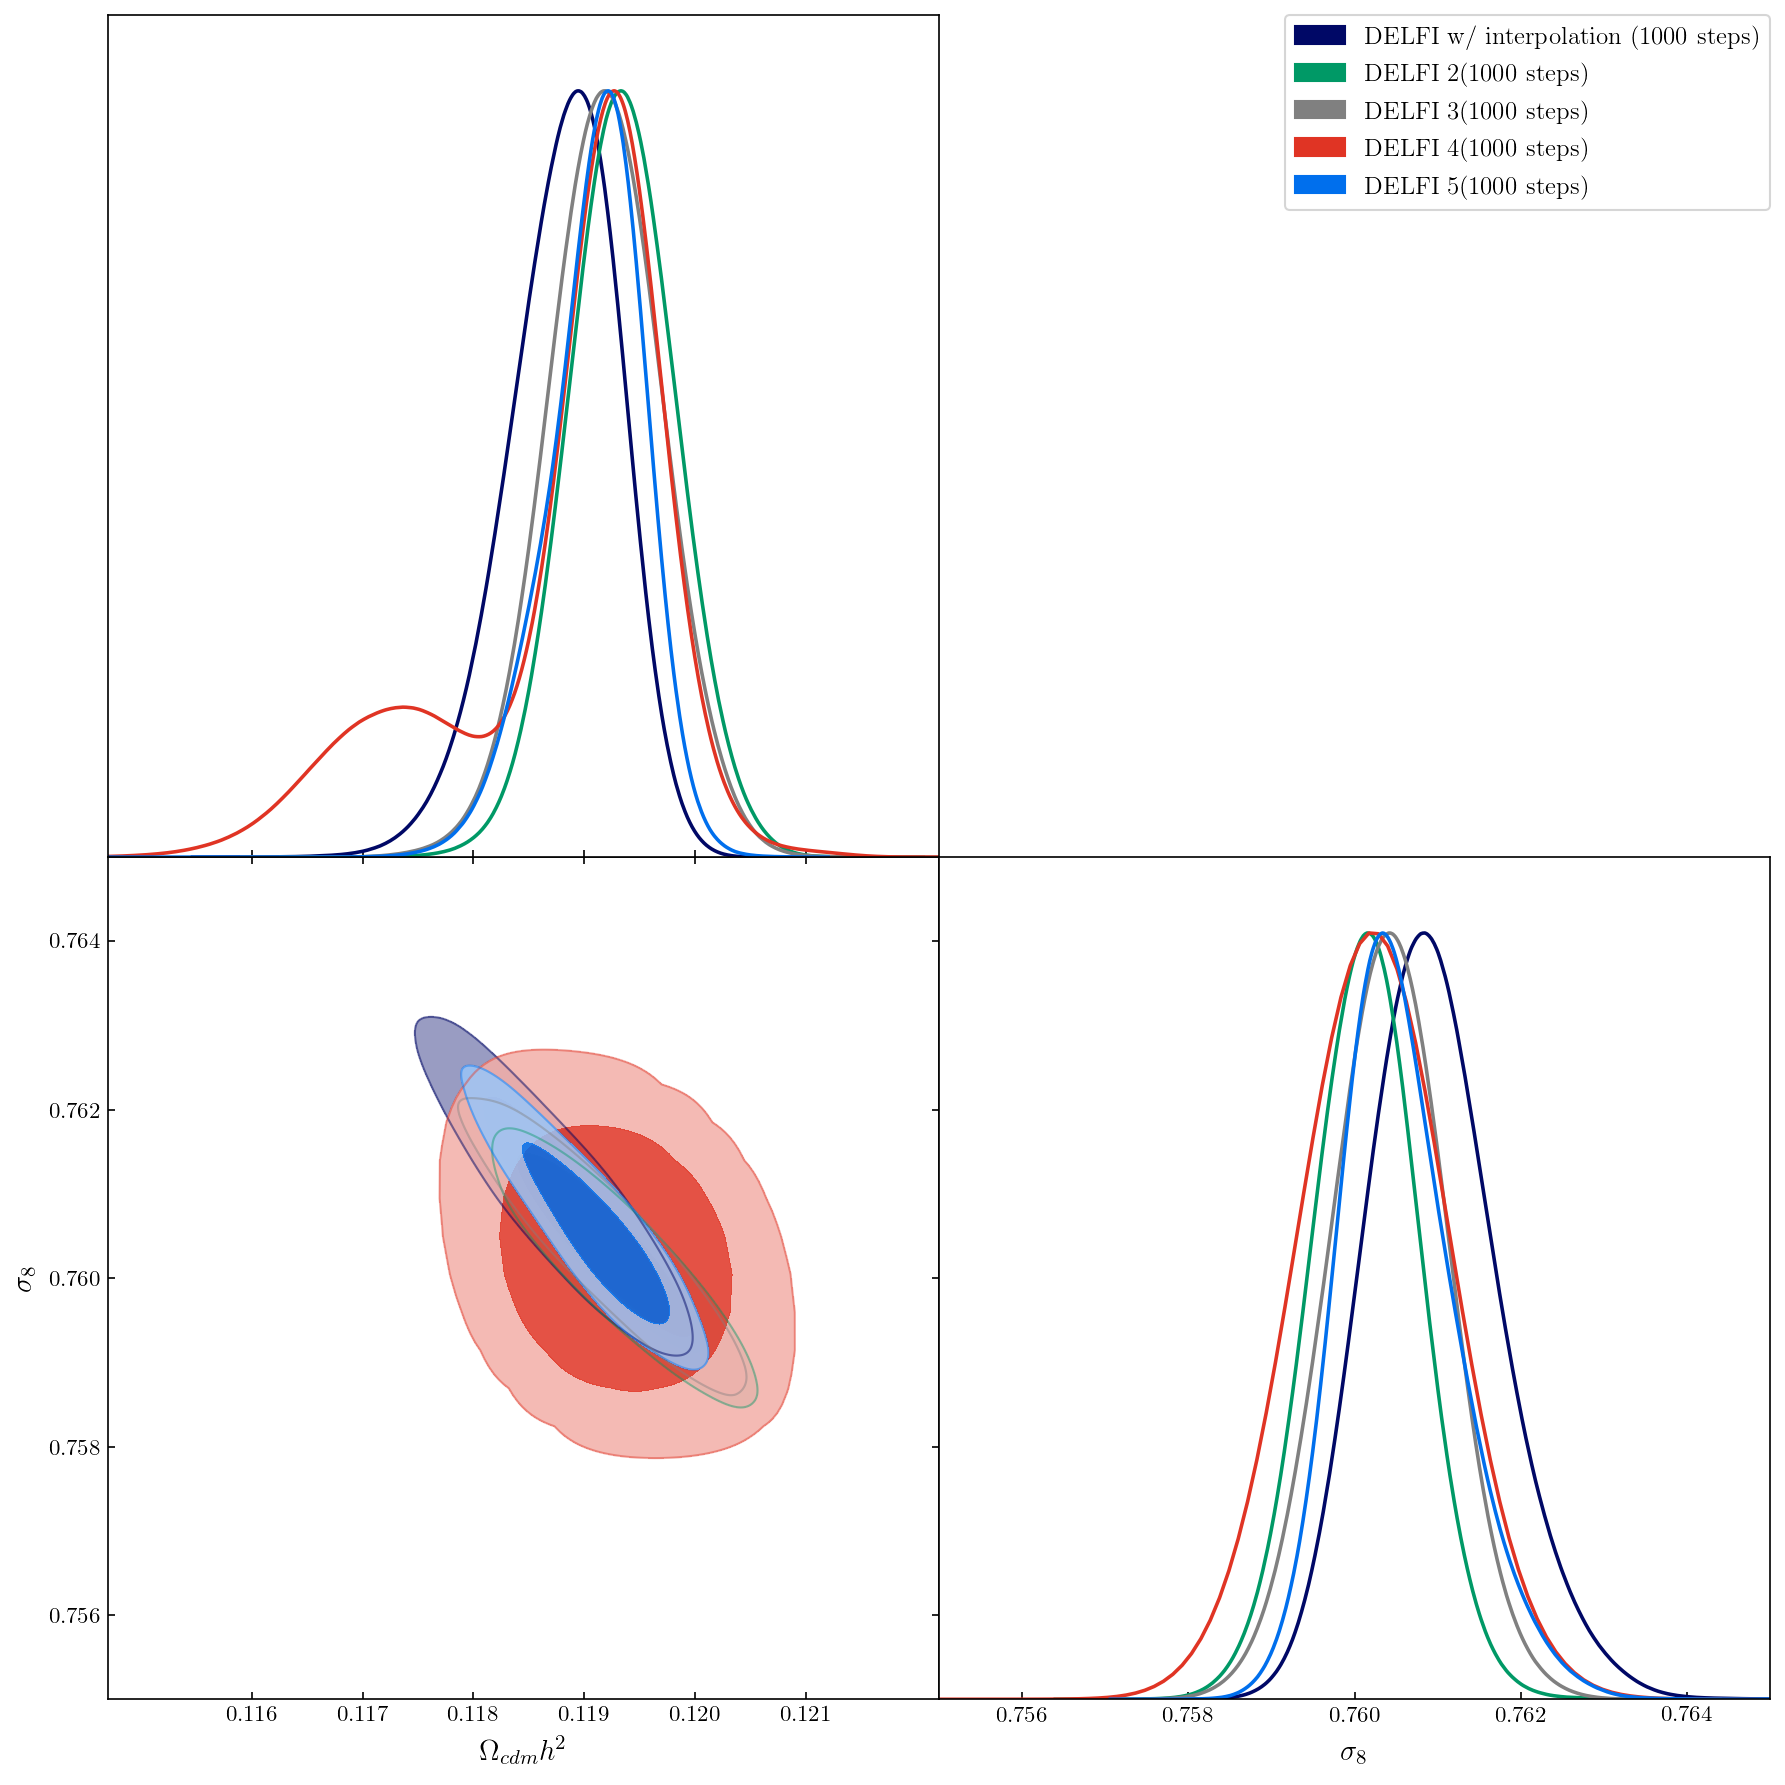

In [31]:
g = plots.getSubplotPlotter(width_inch = 12)
g.triangle_plot([delfi_samples[0], delfi_samples_2[0], delfi_samples_3[0], delfi_samples_4[0], delfi_samples_5[0]], 
                legend_labels = ['DELFI w/ interpolation (1000 steps)', 'DELFI 2(1000 steps)', 'DELFI 3(1000 steps)', 'DELFI 4(1000 steps)', 'DELFI 5(1000 steps)'],
                legend_loc = 'upper right',
                filled_compare=True, normalized=True)

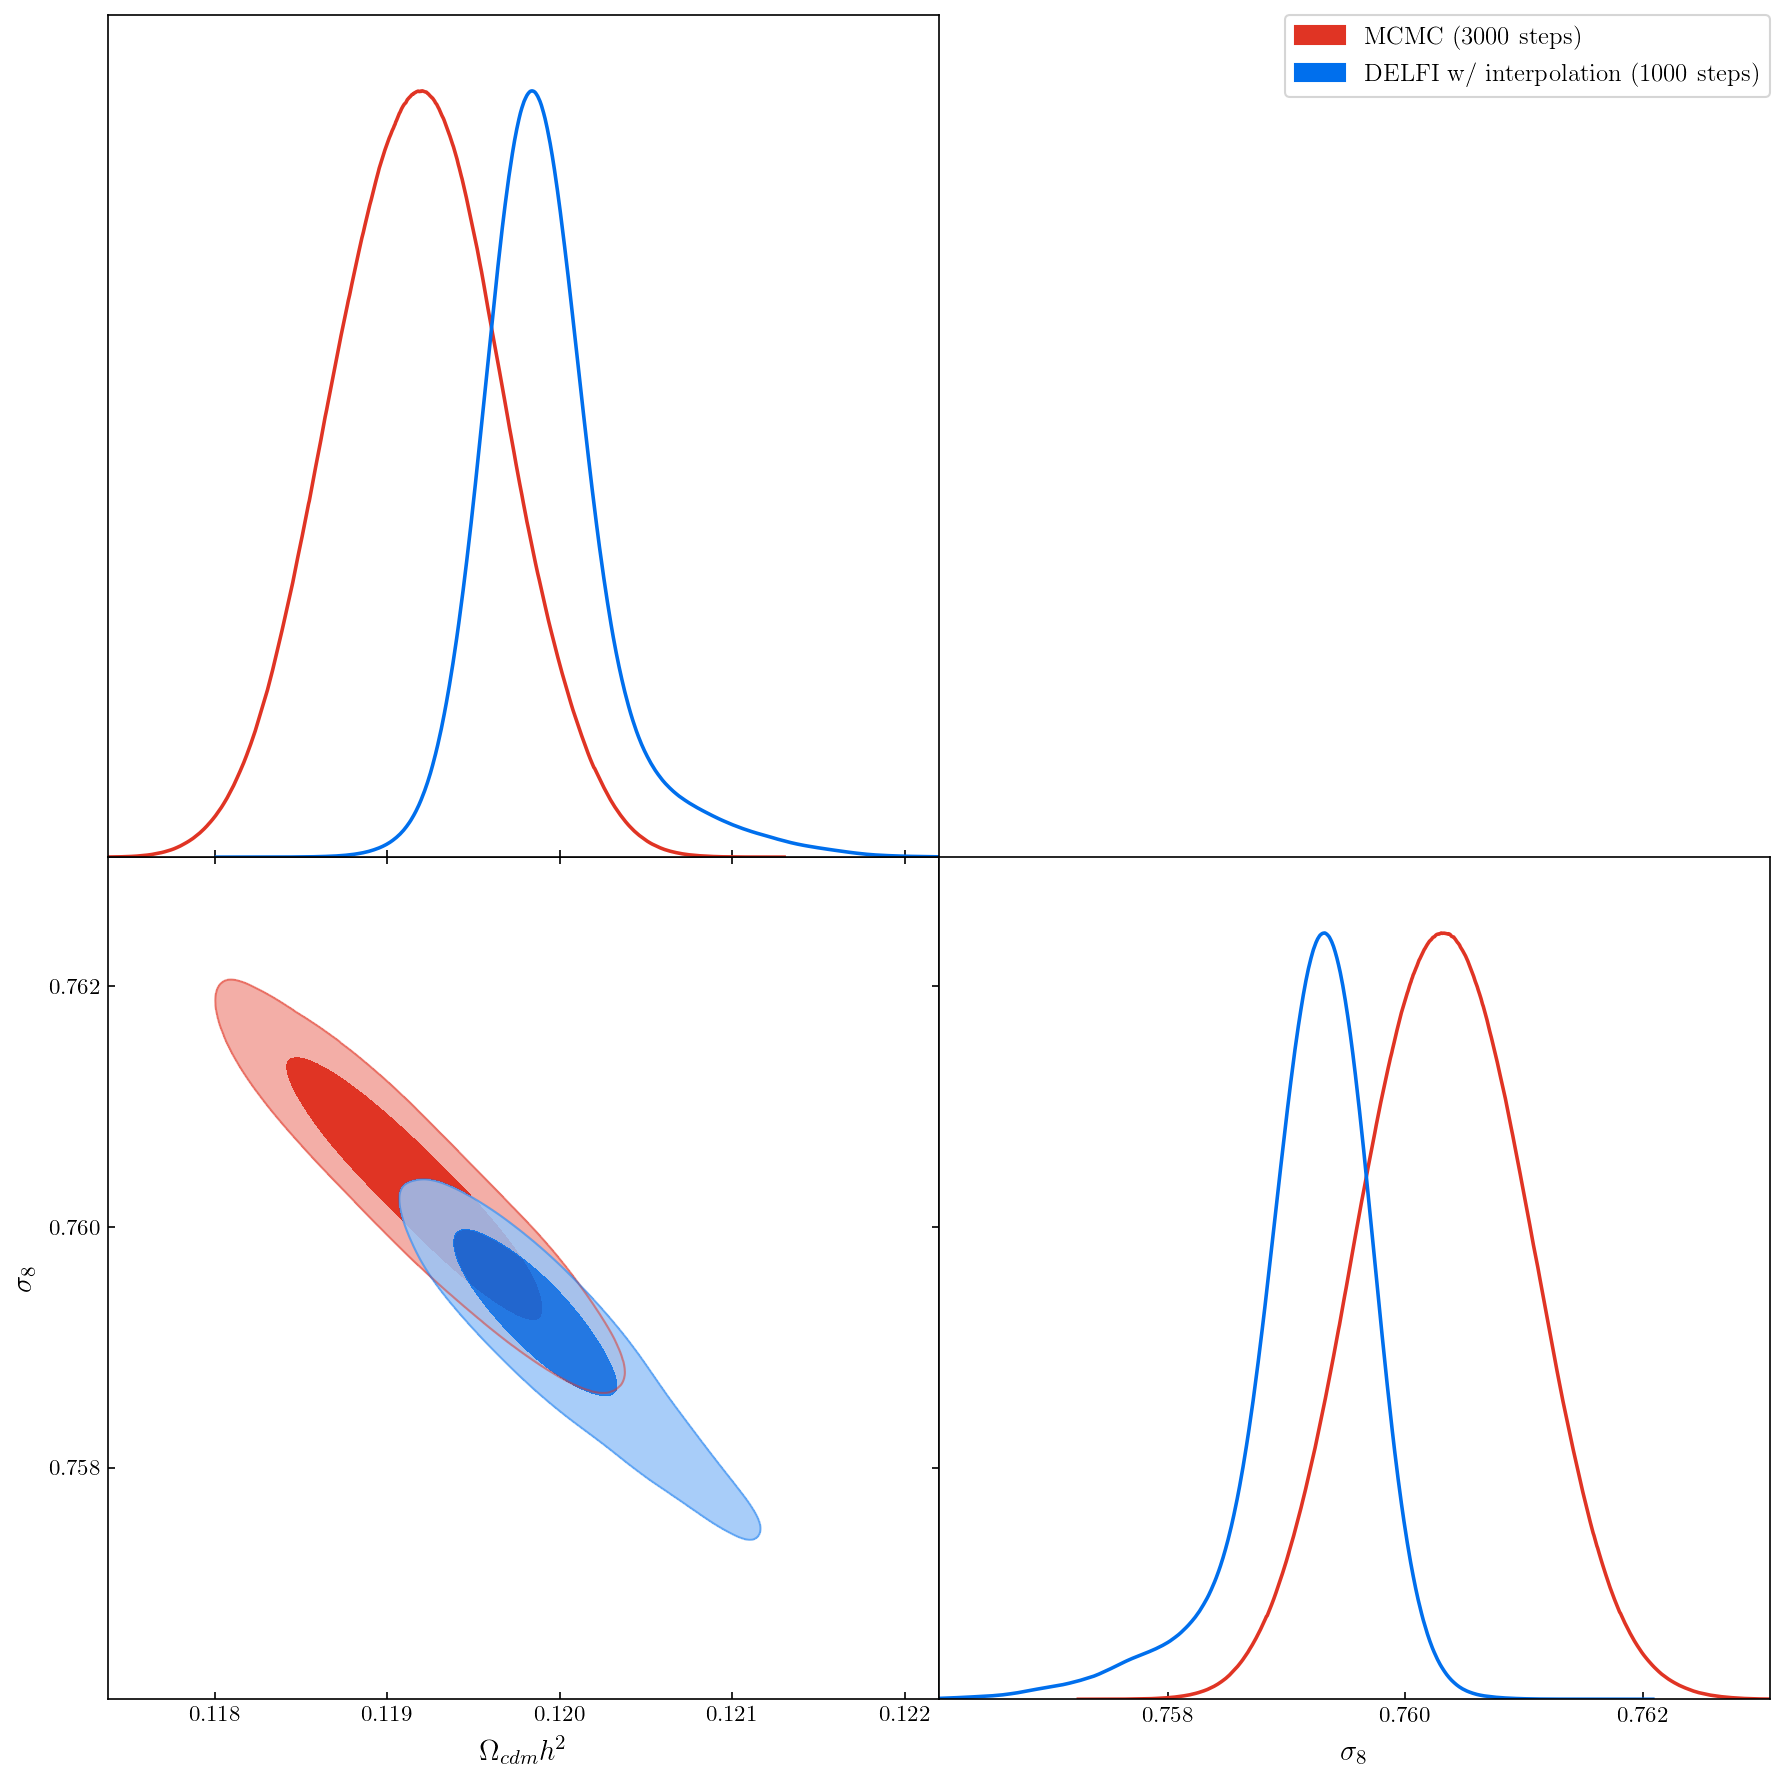

In [29]:
g = plots.getSubplotPlotter(width_inch = 12)
g.triangle_plot([mcmc_samples_s[0], delfi_samples[0]], 
                legend_labels = ['MCMC (3000 steps)', 
                                 'DELFI w/ interpolation (1000 steps)'],
                legend_loc = 'upper right',
                filled_compare=True, normalized=True)

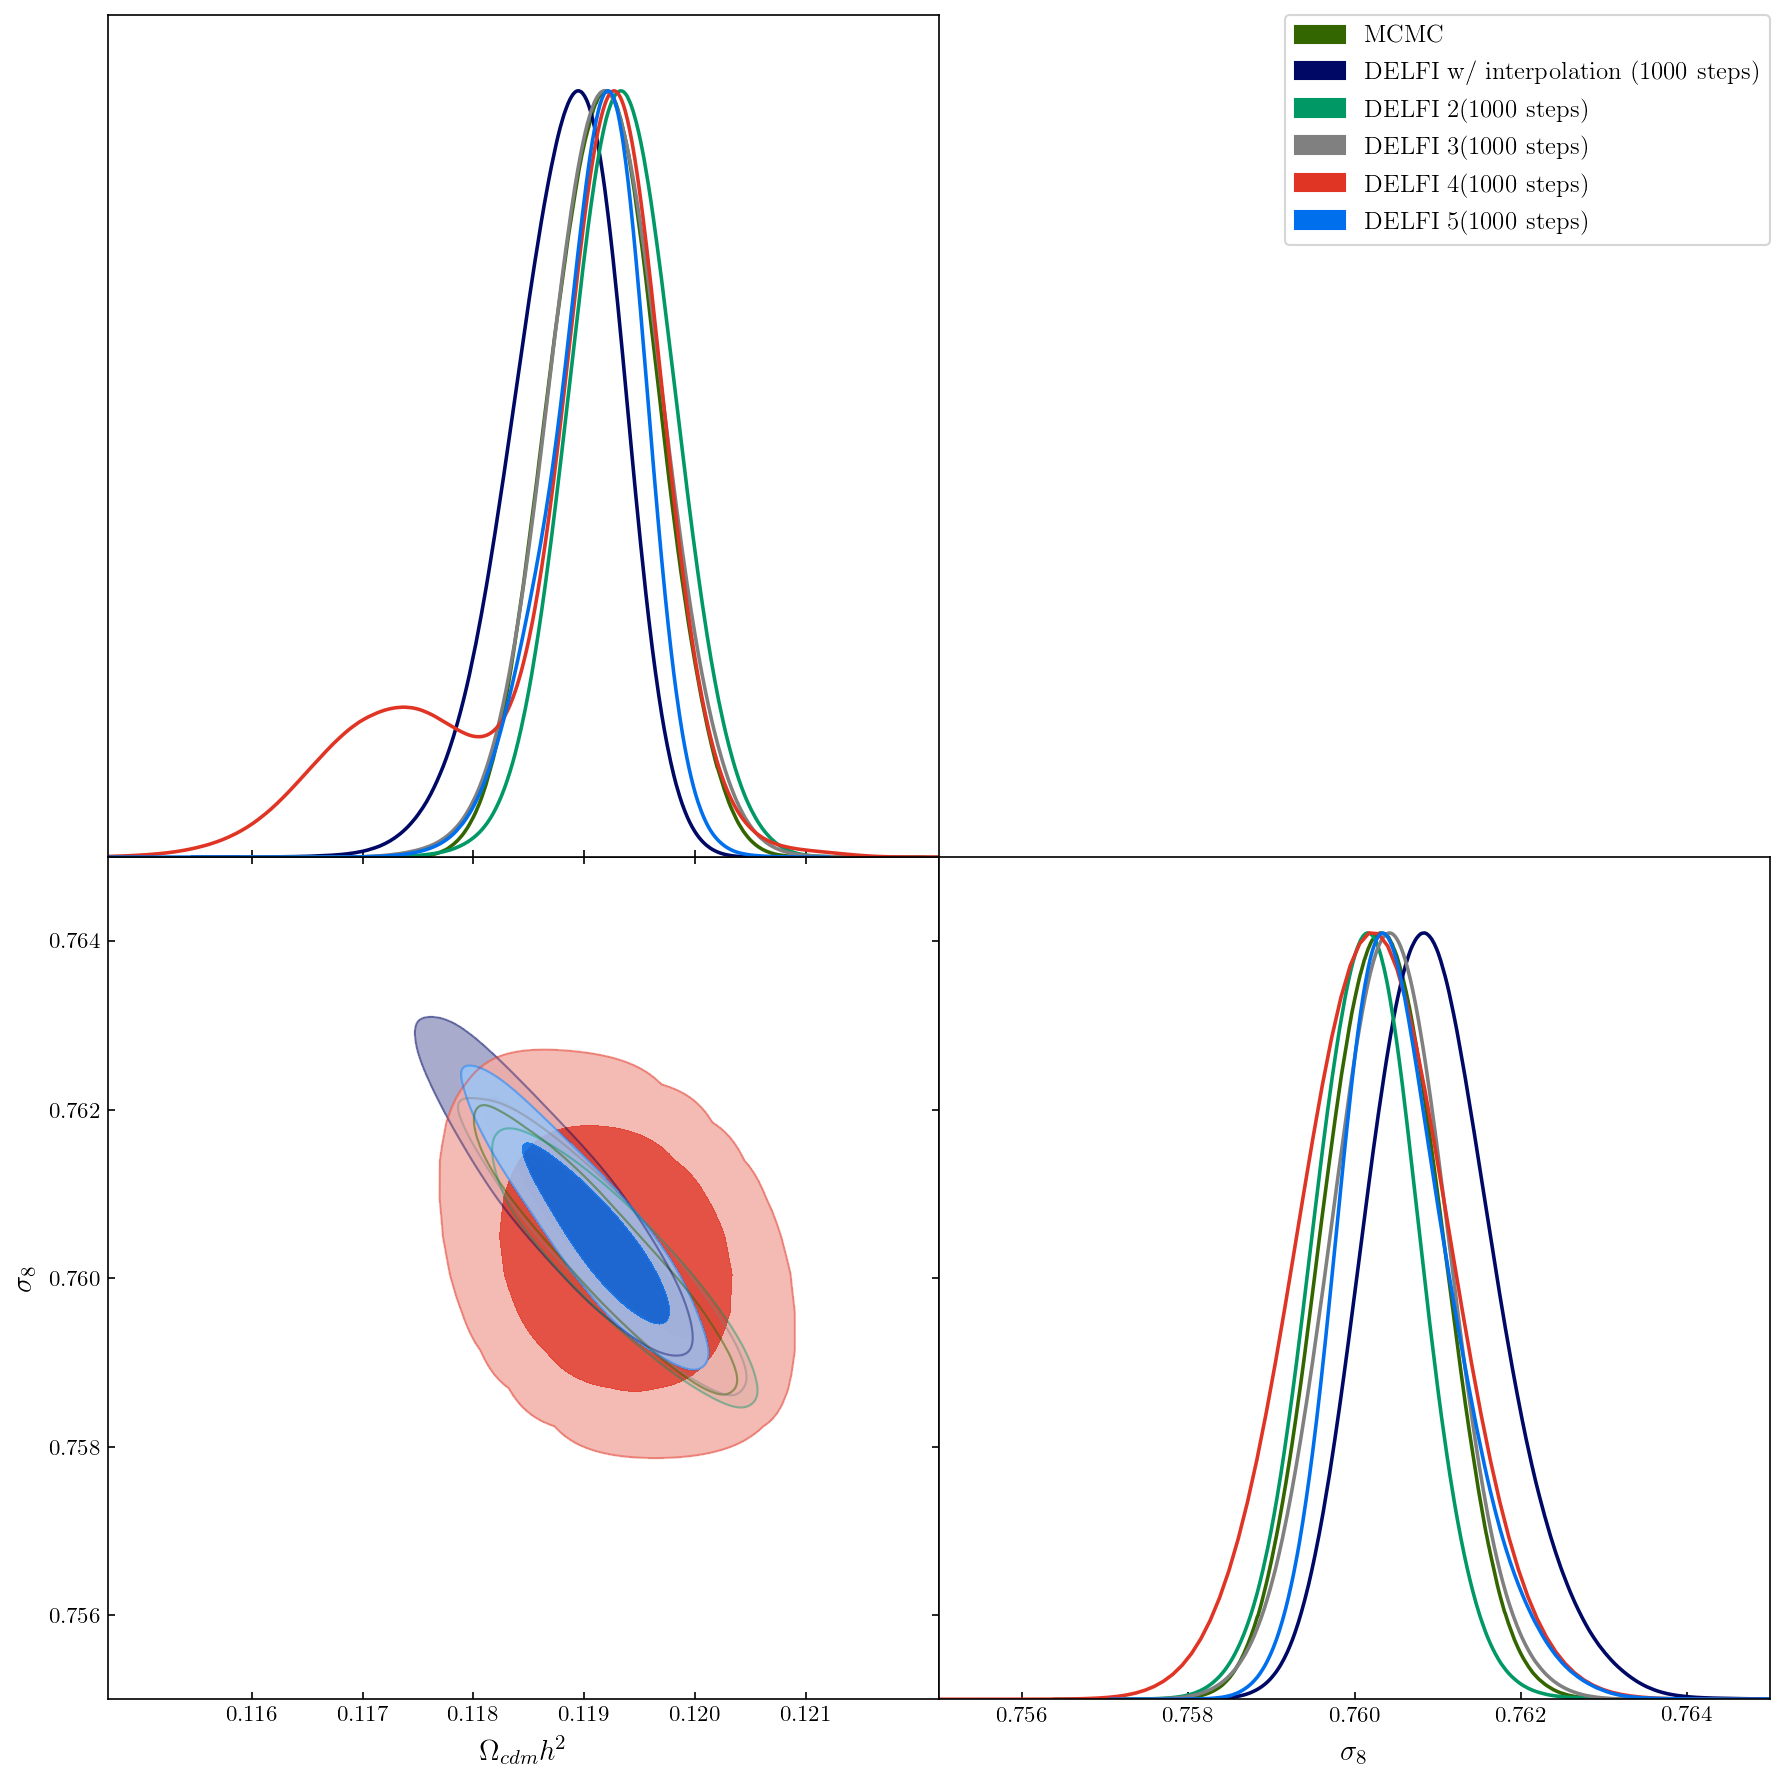

In [32]:
g = plots.getSubplotPlotter(width_inch = 12)
g.triangle_plot([mcmc_samples_s[0], delfi_samples[0], delfi_samples_2[0], delfi_samples_3[0], delfi_samples_4[0], delfi_samples_5[0]], 
                legend_labels = ['MCMC', 'DELFI w/ interpolation (1000 steps)', 'DELFI 2(1000 steps)', 'DELFI 3(1000 steps)', 'DELFI 4(1000 steps)', 'DELFI 5(1000 steps)'],
                legend_loc = 'upper right',
                filled_compare=True, normalized=True)

In [37]:
#posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_2k/posterior_samples.npy')
#posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_2k/posterior_weights.npy')

posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_4k/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp_4k/posterior_weights.npy')


samples = [posterior_samples]
weights = [posterior_weights]
delfi_samples = [MCSamples(samples=s, weights=weights[i], 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        ranges={'\\Omega_{cdm}h^{2}': [0.1118, 0.1222], '\\sigma_{8}': [0.755, 0.765]}) 
                        #ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(samples)]

Removed no burn in


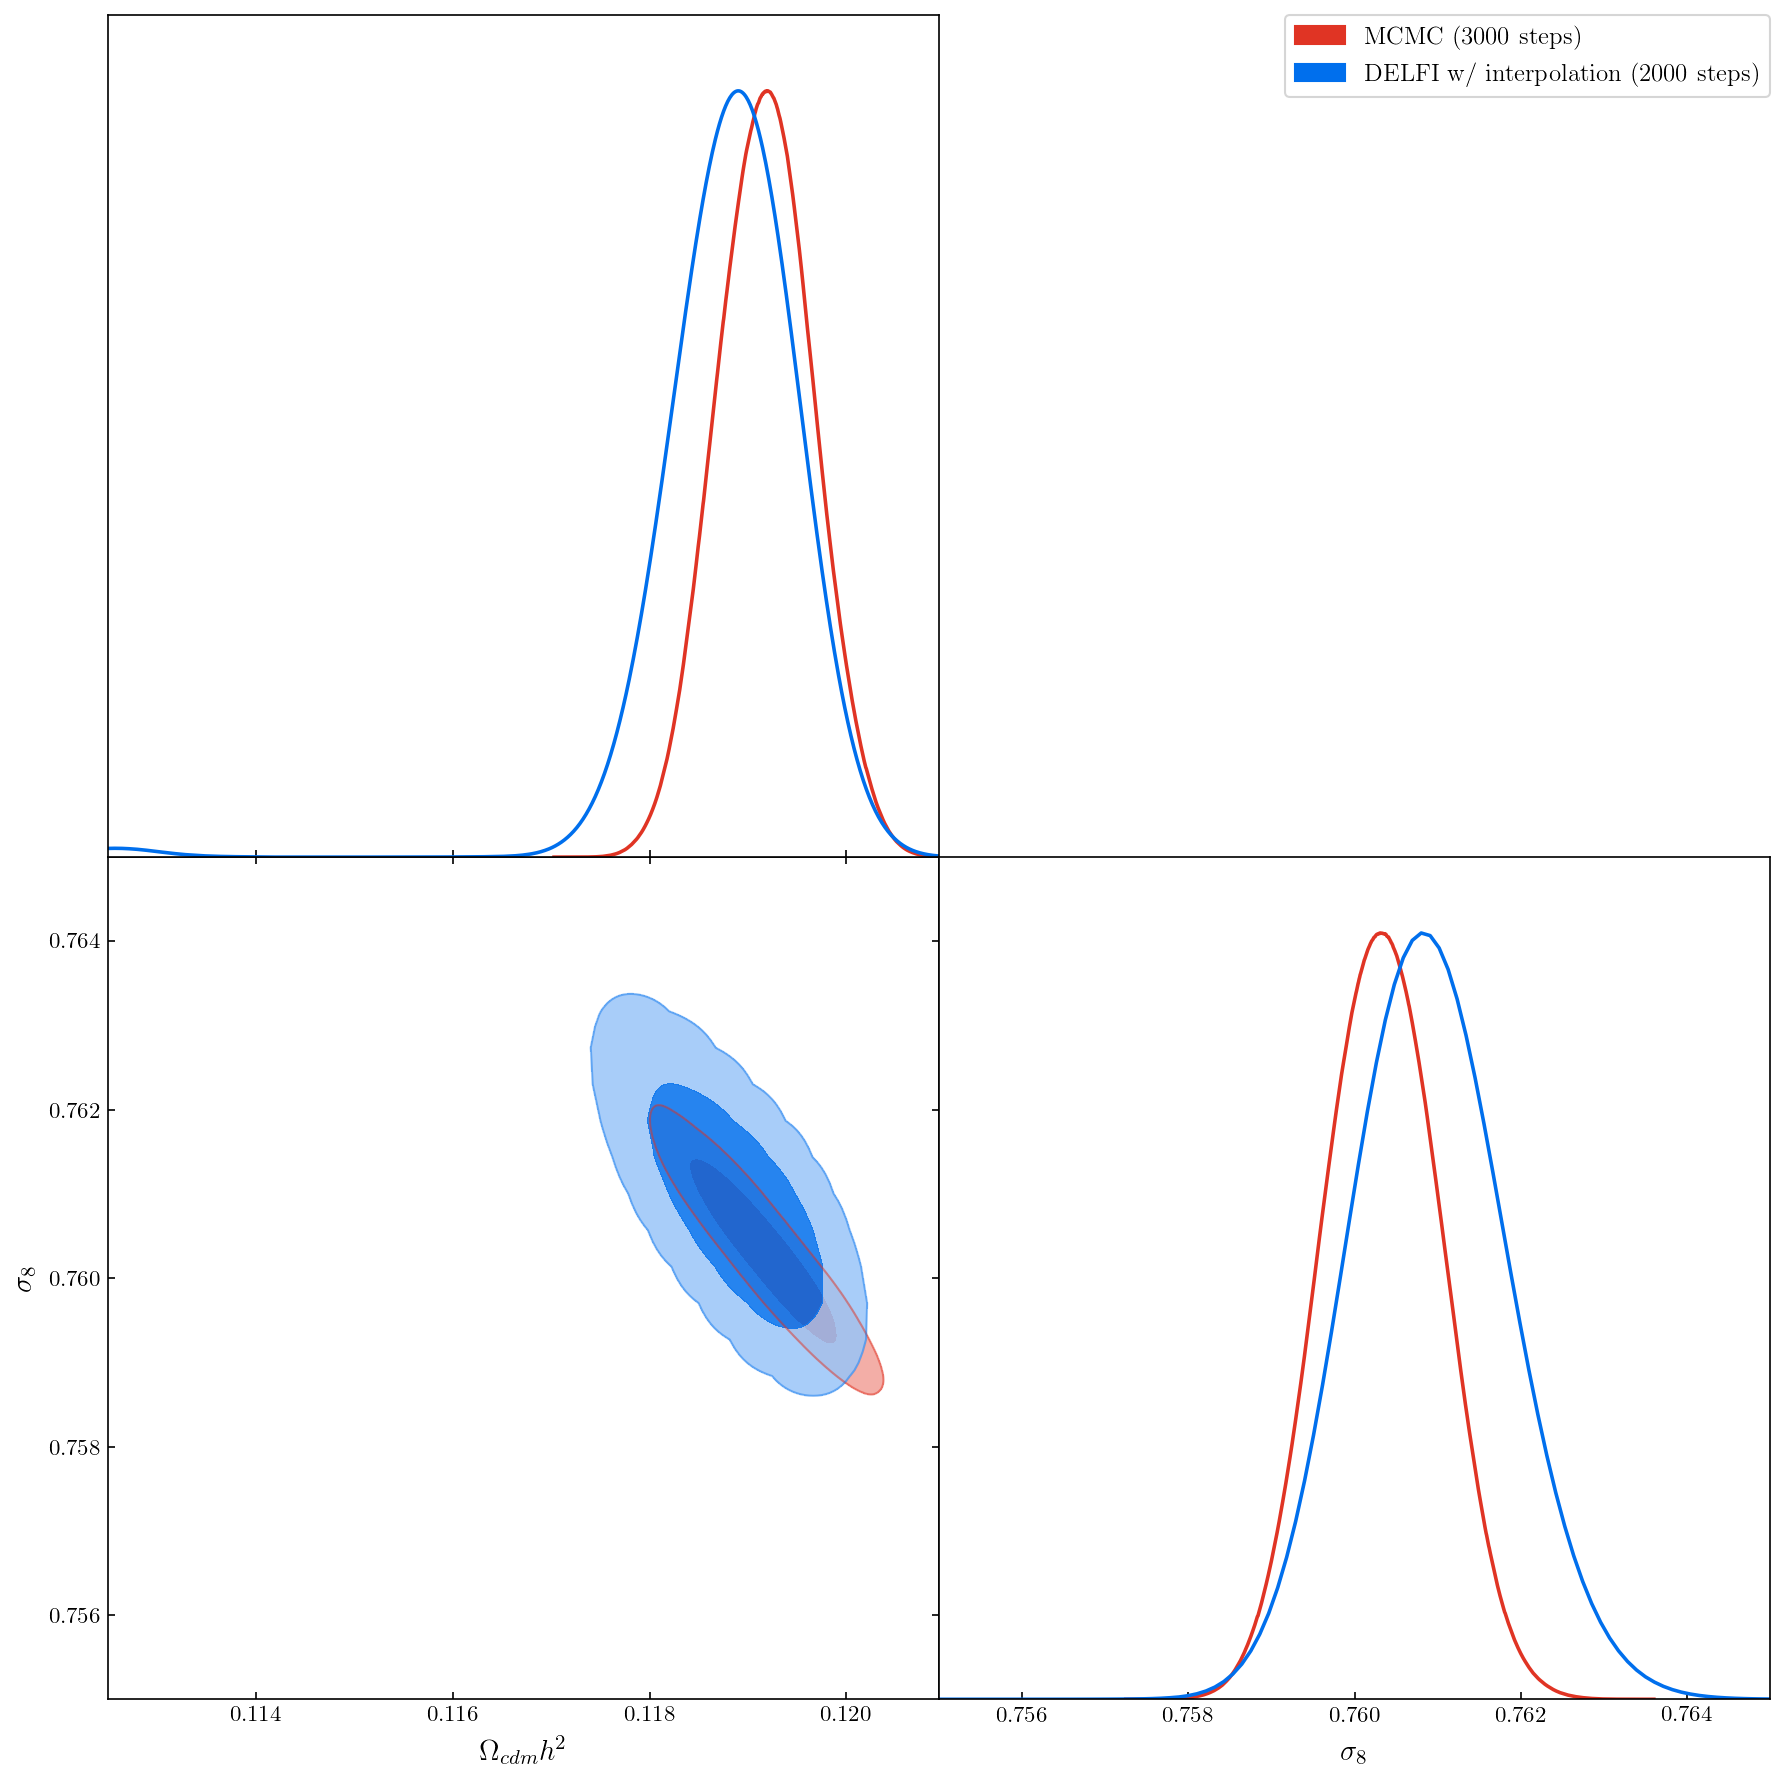

In [38]:
g = plots.getSubplotPlotter(width_inch = 12)
g.triangle_plot([mcmc_samples_s[0], delfi_samples[0]], 
                legend_labels = ['MCMC (3000 steps)', 
                                 'DELFI w/ interpolation (2000 steps)'],
                legend_loc = 'upper right',
                filled_compare=True, normalized=True)

In [15]:
posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_fiducial_interp/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_fiducial_interp/posterior_weights.npy')

samples = [posterior_samples]
weights = [posterior_weights]
delfi_samples = [MCSamples(samples=s, weights=weights[i], 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        #ranges={'\\Omega_{cdm}h^{2}': [0.1118, 0.1222], '\\sigma_{8}': [0.755, 0.765]}) 
                        ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(samples)]

Removed no burn in


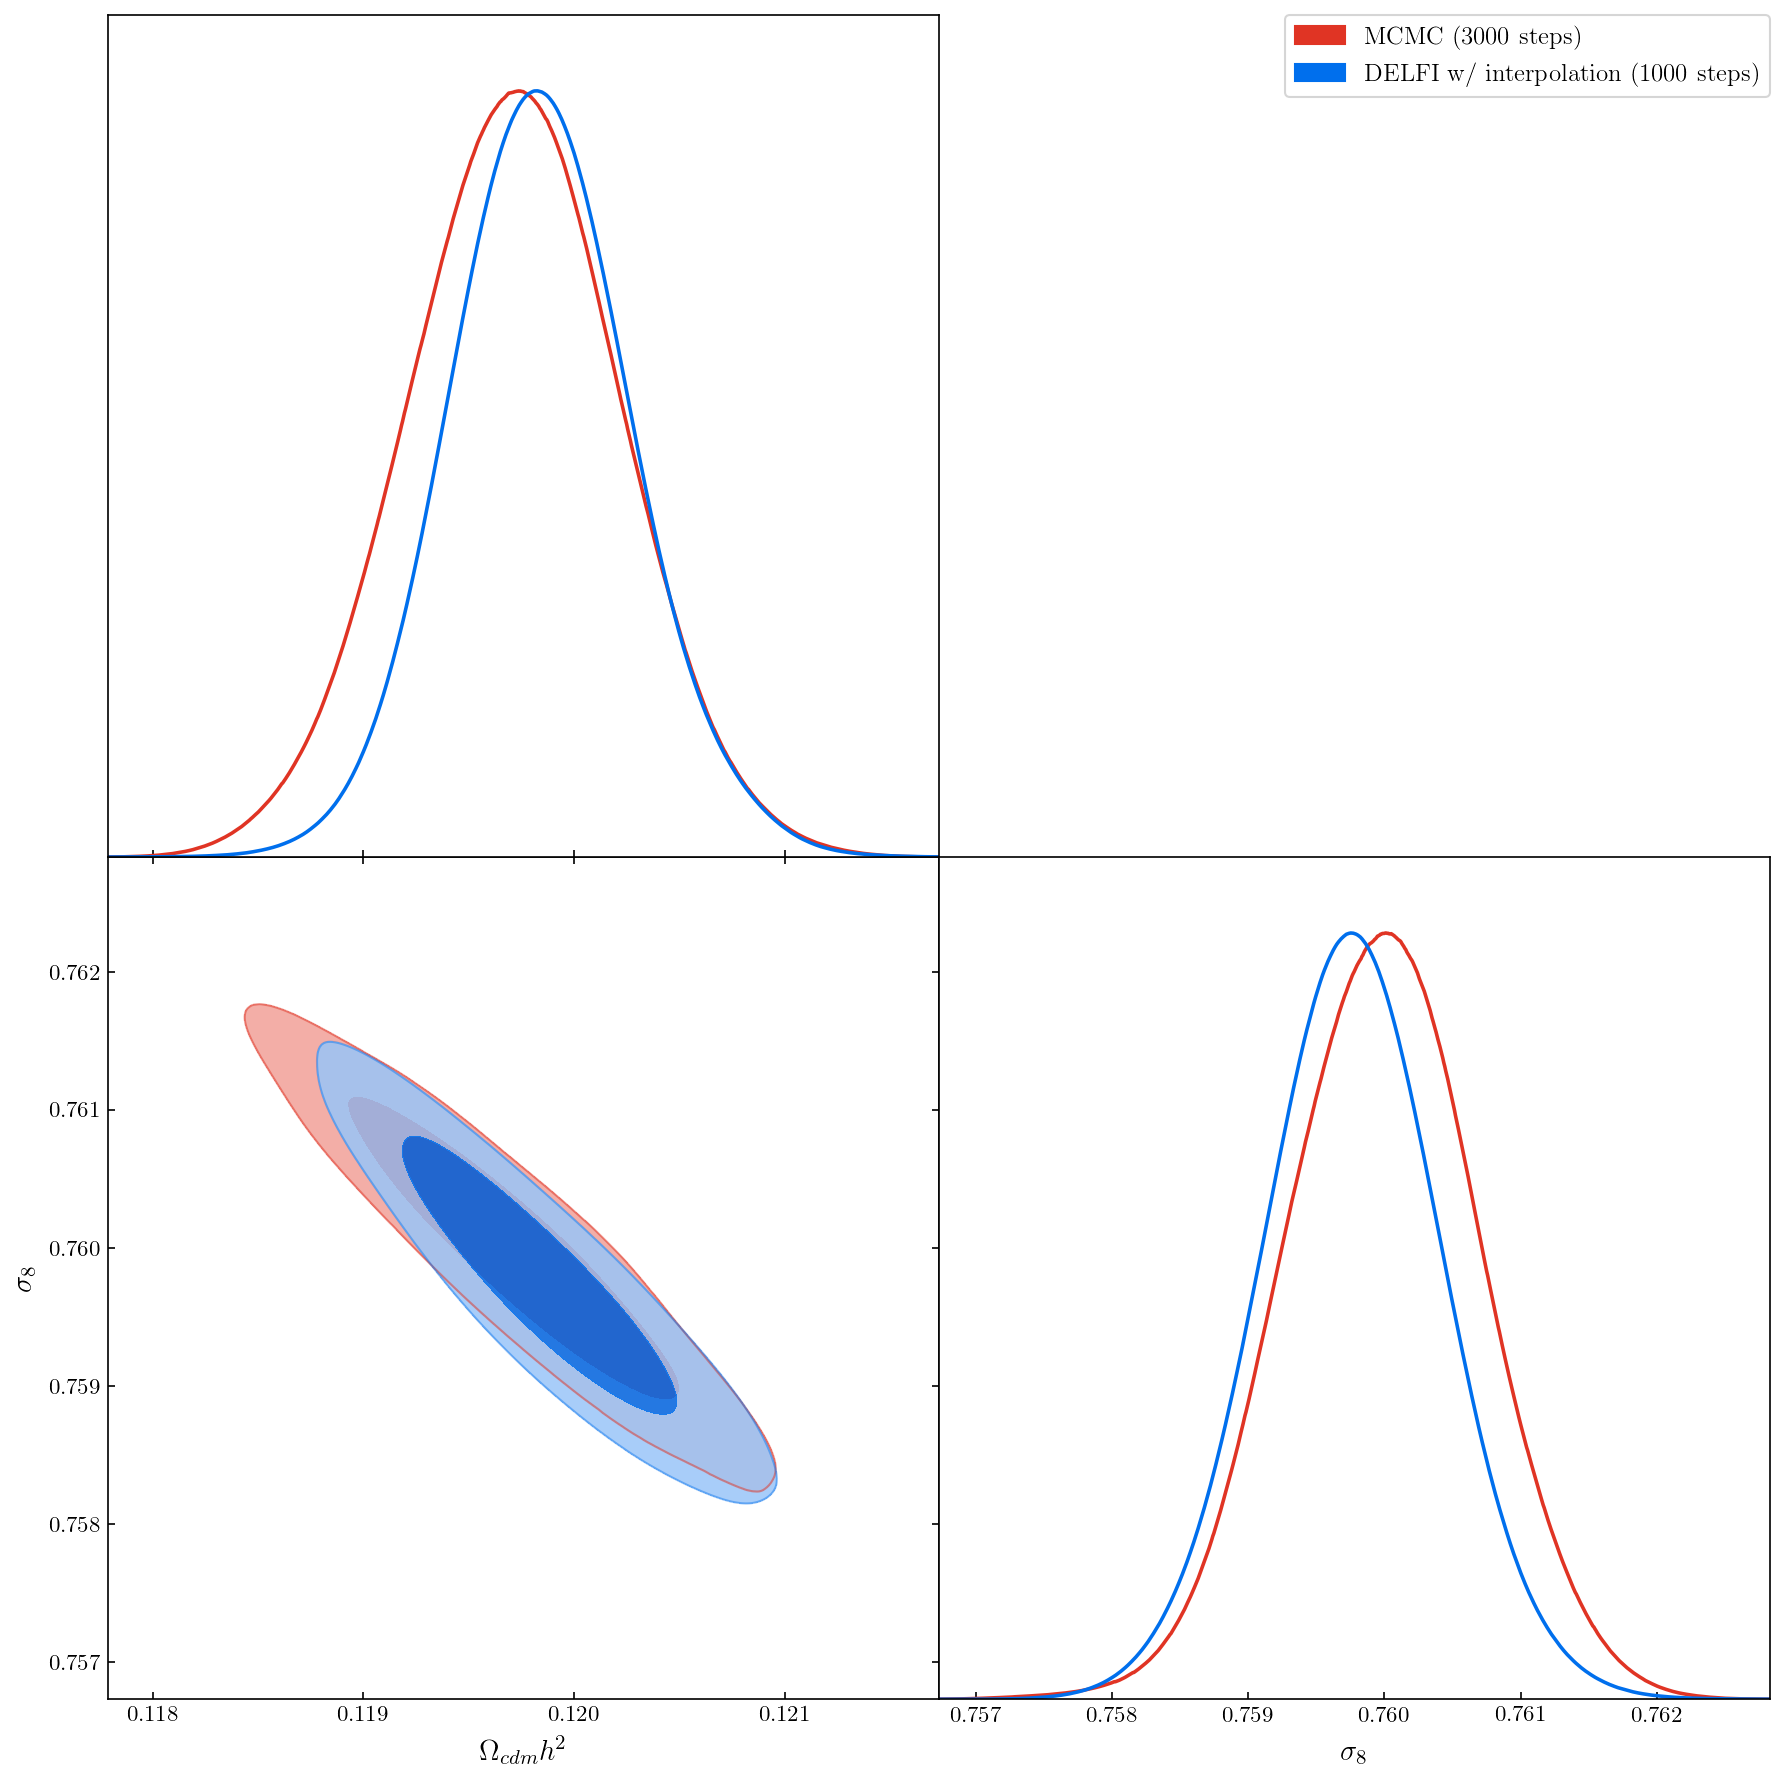

In [16]:
g = plots.getSubplotPlotter(width_inch = 12)
g.triangle_plot([mcmc_samples[0], delfi_samples[0]], 
                legend_labels = ['MCMC (3000 steps)', 'DELFI w/ interpolation (1000 steps)'],
                legend_loc = 'upper right',
                filled_compare=True, normalized=True)

In [17]:
posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_fiducial_interp_2k/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_fiducial_interp_2k/posterior_weights.npy')

samples = [posterior_samples]
weights = [posterior_weights]
delfi_samples = [MCSamples(samples=s, weights=weights[i], 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        #ranges={'\\Omega_{cdm}h^{2}': [0.1118, 0.1222], '\\sigma_{8}': [0.755, 0.765]}) 
                        ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(samples)]

Removed no burn in


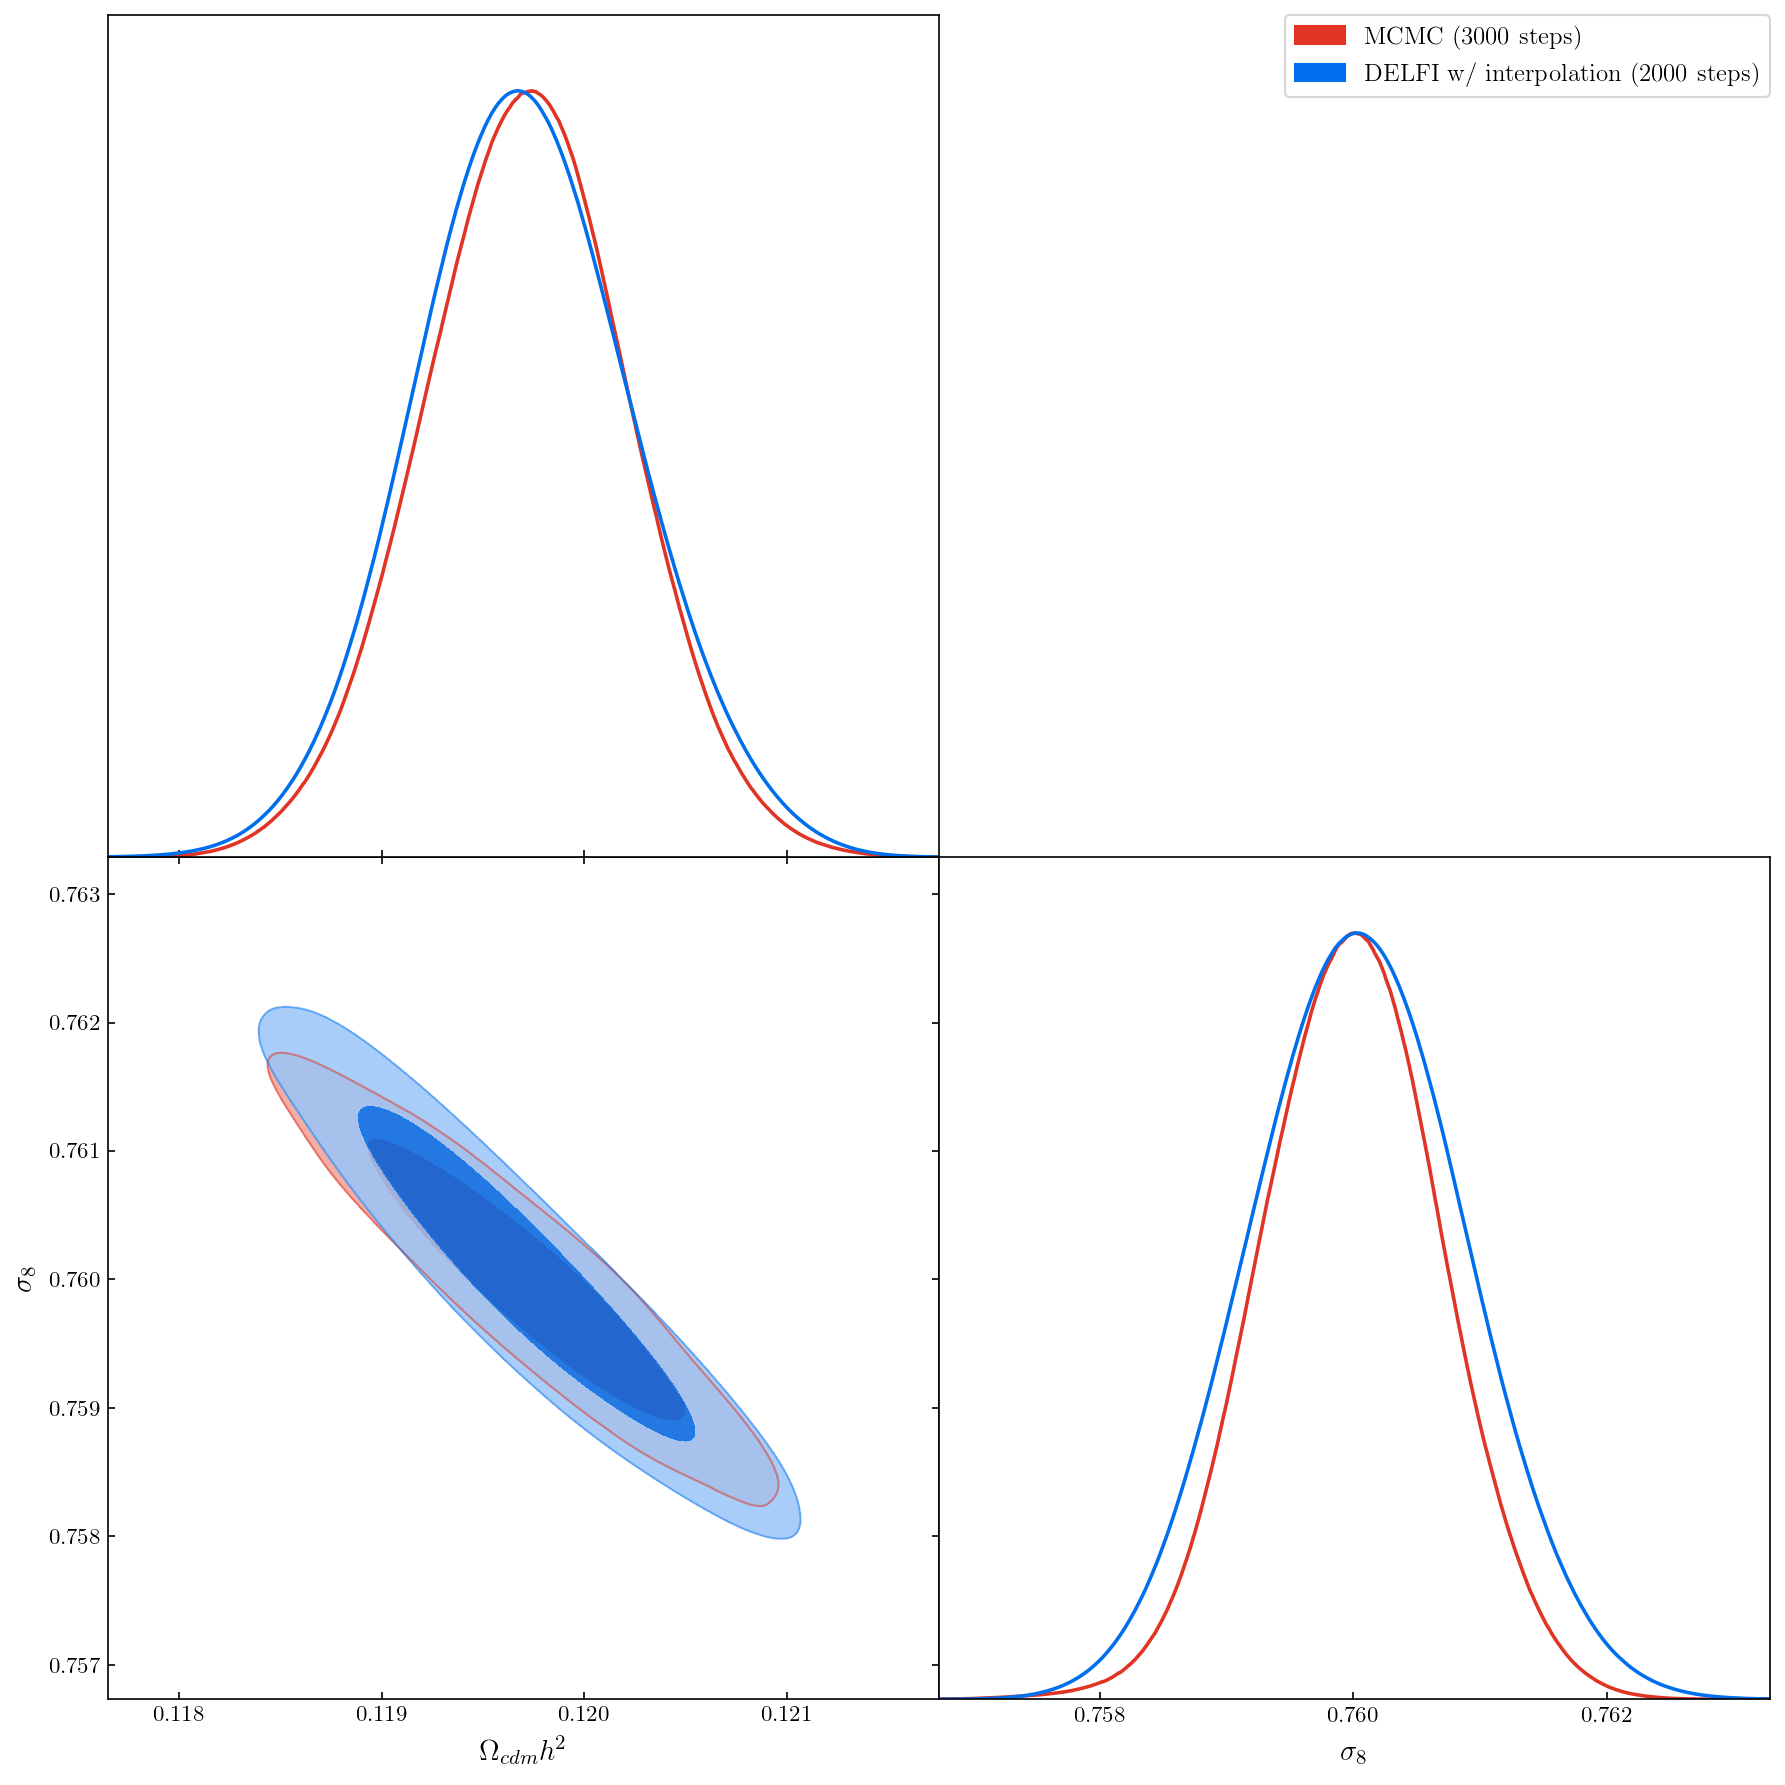

In [18]:
g = plots.getSubplotPlotter(width_inch = 12)
g.triangle_plot([mcmc_samples[0], delfi_samples[0]], 
                legend_labels = ['MCMC (3000 steps)', 'DELFI w/ interpolation (2000 steps)'],
                legend_loc = 'upper right',
                filled_compare=True, normalized=True)

### (4) Interpolation_2

In [21]:
posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_fiducial_interp2/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_fiducial_interp2/posterior_weights.npy')

samples = [posterior_samples]
weights = [posterior_weights]
delfi_samples = [MCSamples(samples=s, weights=weights[i], 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        #ranges={'\\Omega_{cdm}h^{2}': [0.1118, 0.1222], '\\sigma_{8}': [0.755, 0.765]}) 
                        ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(samples)]

Removed no burn in


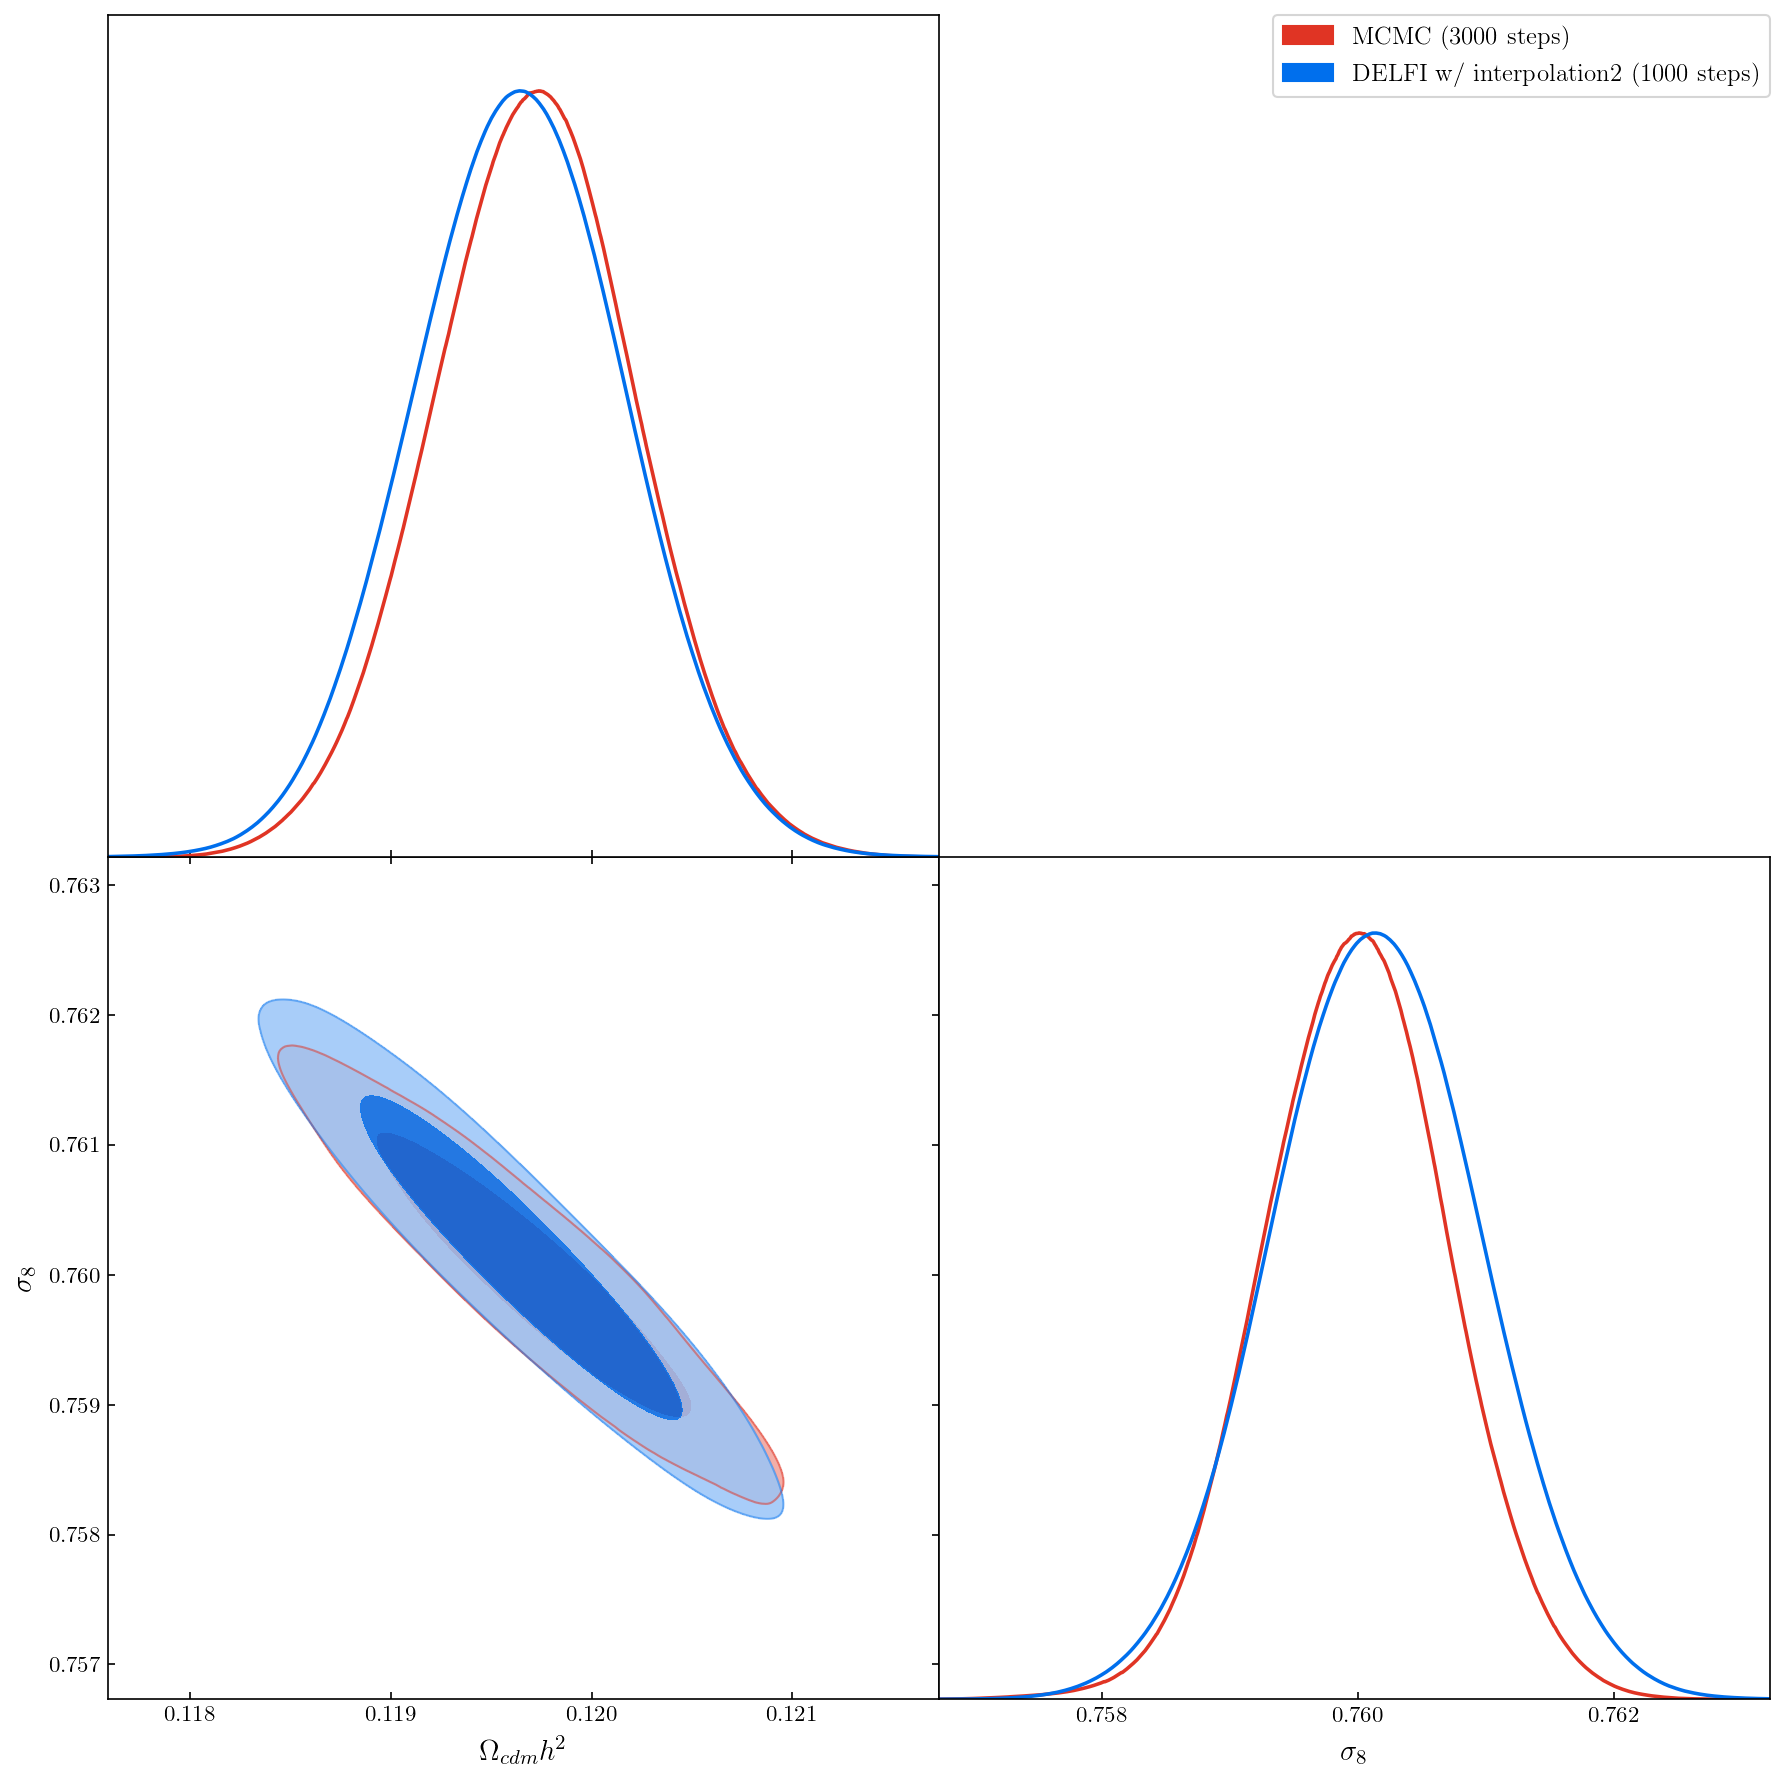

In [22]:
g = plots.getSubplotPlotter(width_inch = 12)
g.triangle_plot([mcmc_samples[0], delfi_samples[0]], 
                legend_labels = ['MCMC (3000 steps)', 'DELFI w/ interpolation2 (1000 steps)'],
                legend_loc = 'upper right',
                filled_compare=True, normalized=True)

In [28]:
posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp2_2k/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp2_2k/posterior_weights.npy')

posterior_samples = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp2/posterior_samples.npy')
posterior_weights = np.loadtxt('simulators/mass_function_n_counts/results_mock_trial_long_sims_seed1_interp2/posterior_weights.npy')

samples = [posterior_samples]
weights = [posterior_weights]
delfi_samples_s = [MCSamples(samples=s, weights=weights[i], 
                        names=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'], 
                        labels=['\\Omega_{cdm}h^{2}', '\\sigma_{8}'],
                        #ranges={'\\Omega_{cdm}h^{2}': [0.1118, 0.1222], '\\sigma_{8}': [0.755, 0.765]}) 
                        ranges={'\\Omega_{cdm}h^{2}': [0.1125, 0.1275], '\\sigma_{8}': [0.6, 1.1]}) 
              for i, s in enumerate(samples)]

Removed no burn in


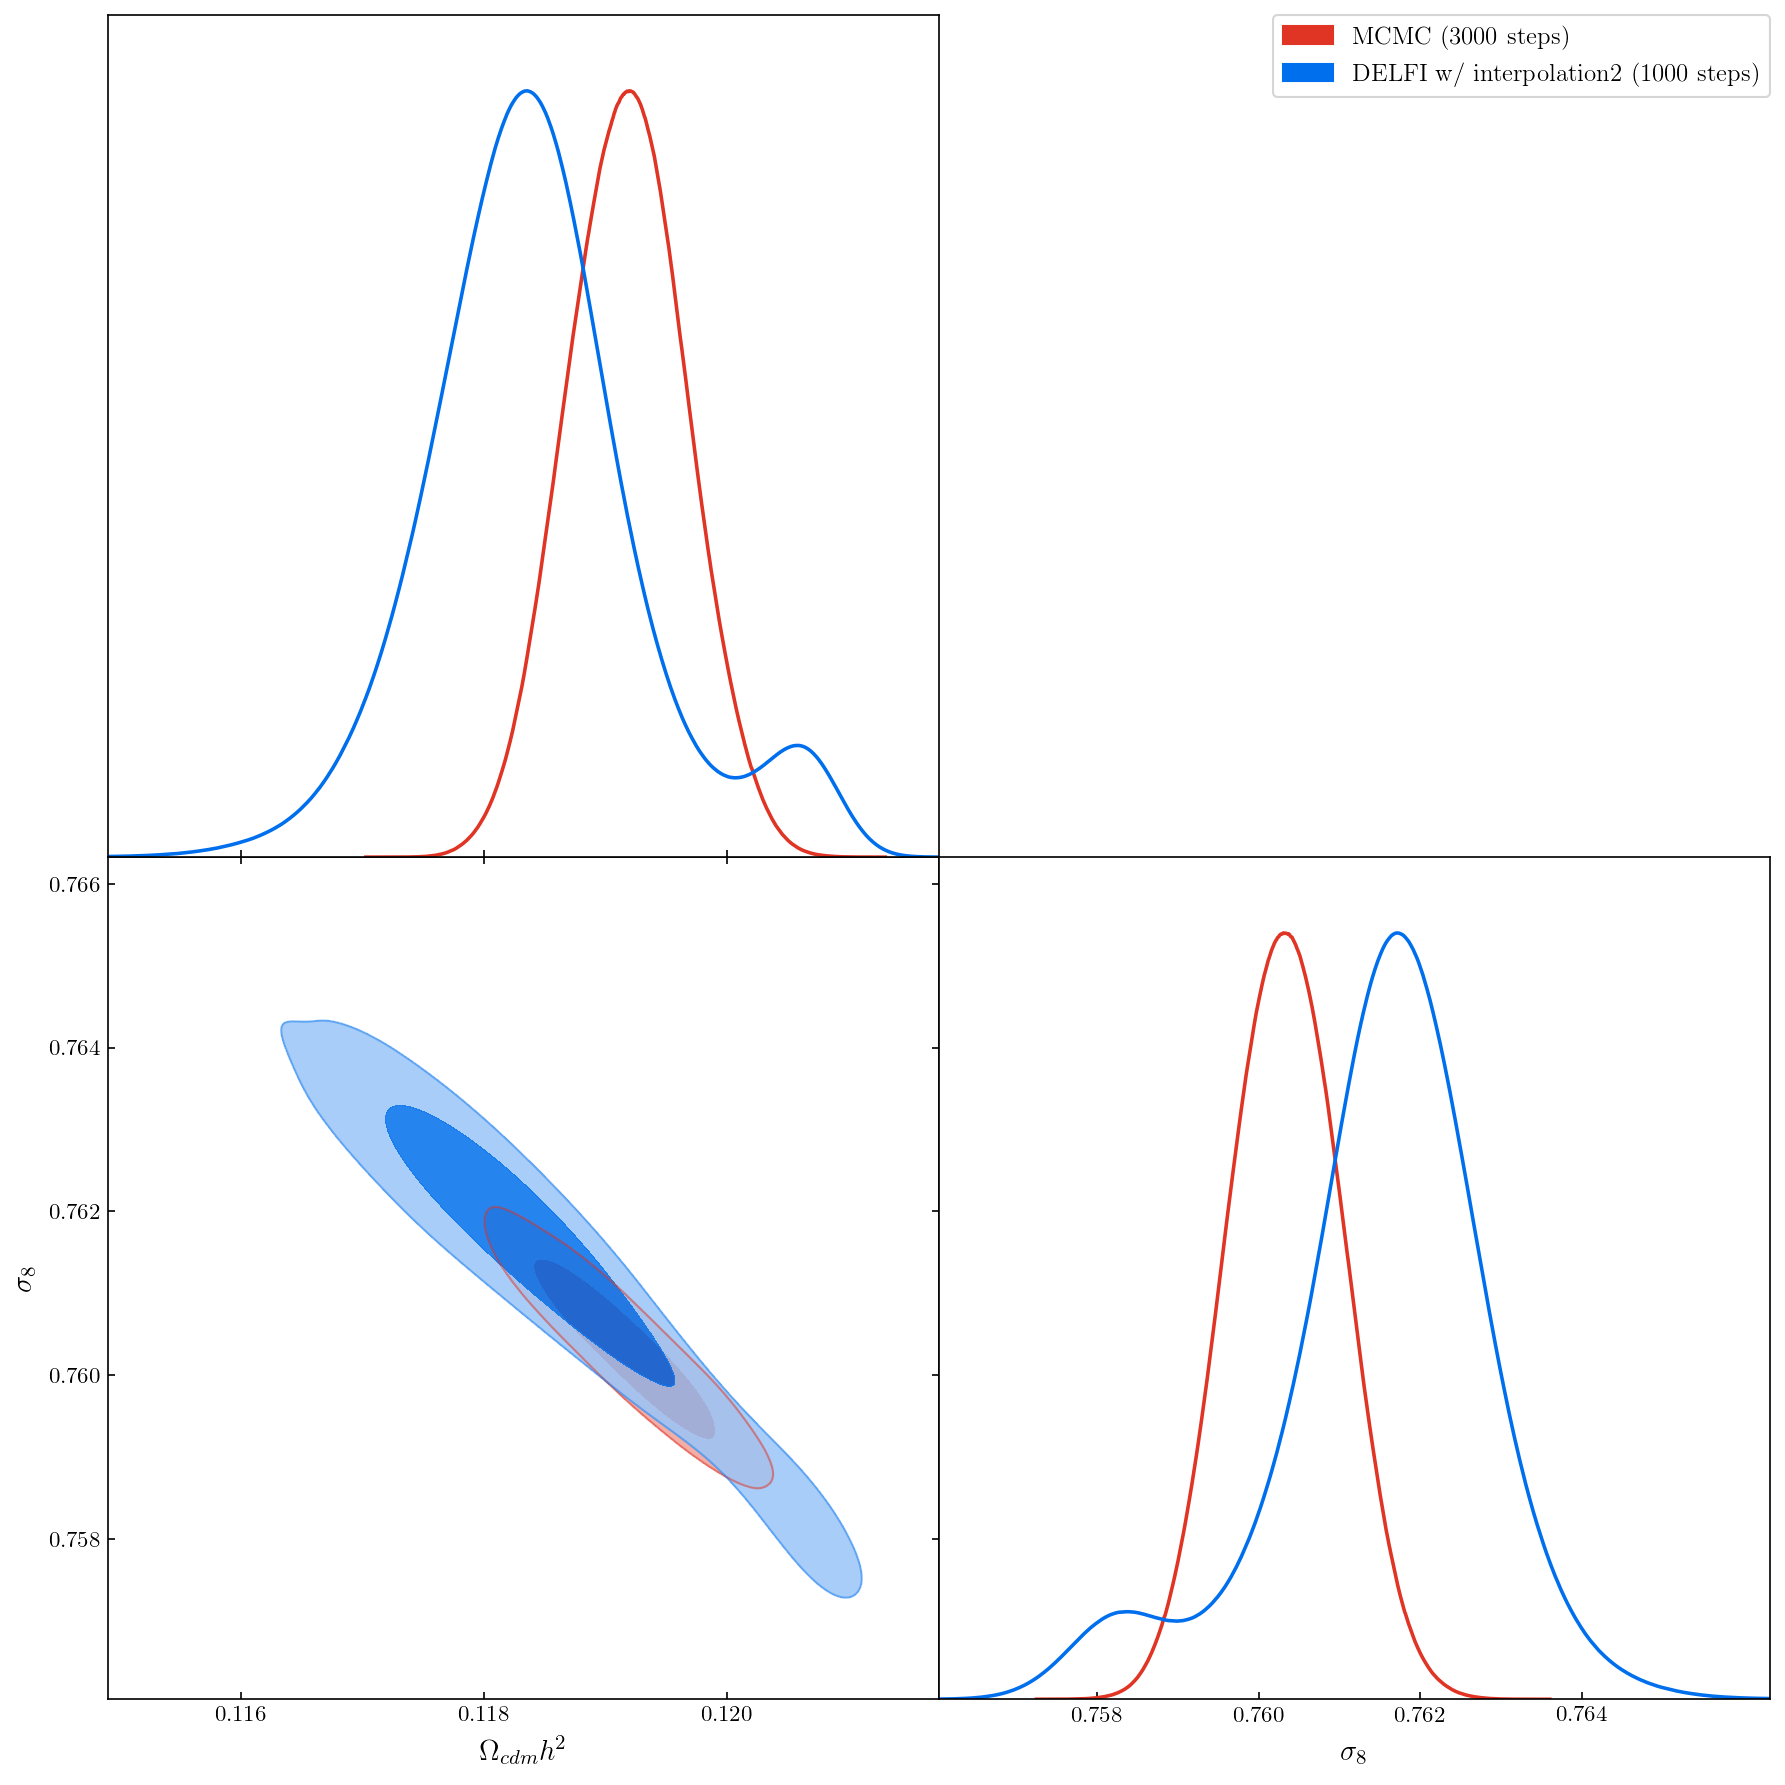

In [29]:
g = plots.getSubplotPlotter(width_inch = 12)
g.triangle_plot([mcmc_samples_s[0], delfi_samples_s[0]], 
                legend_labels = ['MCMC (3000 steps)', 'DELFI w/ interpolation2 (1000 steps)'],
                legend_loc = 'upper right',
                filled_compare=True, normalized=True)